<a href="https://colab.research.google.com/github/hsantos1985/R-Jobs/blob/main/PROJETO_MODELO_SERIE_TEMPORAL_PARTE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PROJETO DE CRIAÇÃO DE MODELO DE SÉRIES TEMPORAIS COM R

#####-O OBJETIVO DESTE PROJETO É CRIAR MODELOS DE TIME SERIES BASEADOS NOS DADOS PLUVIOMÉTRICOS MENSAIS DA CIDADE DE SÃO PAULO.  ENTRE 1985 E 2023.COM ISSO, REALIZAR O COMPARATIVO ENTRE ESTES MODELOS


---Os dados podem ser encontrados conforme abaixo:
https://hidrologia.spaguas.sp.gov.br/

PREFIXO: 	E3-262

NOME DO POSTO: 	GUARAU

MUNICÍPIO: 	SAO PAULO

CURSO D'ÁGUA: 	CABUCU DE BAIXO,R/(ITAGUACU,COR)

LATITUDE: 	23°26'33"

LONGITUDE: 	46°39'01"

Obs: valores com --- representam dados inexistentes.

Chuva Mensal (mm)


####1-BIBLIOTECAS

In [ ]:
install.packages("dplyr")
install.packages('forecast')
install.packages("tidyr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(forecast)
library(dplyr)
library(tidyr)
library(urca)

In [ ]:
#configuração dos gráficos
options(repr.plot.width = 19, repr.plot.height = 10)

####2-OBTENÇÃO DOS DADOS

#####2.1-BUSCANDO OS ARQUIVOS

In [ ]:
#OBTENDO OS DADOS
chuva_mensal<-
  read.csv2('/content/chuva_mensal_atualizada.csv', sep = ";", encoding = 'UTF-8')


In [ ]:
View(chuva_mensal)

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1985,"184,9","242,9",230,59.00,126.20,"14,6",4.00,"21,8","126,1","71,1","111,3","155,2"
1986,"199,6",221,"218,7",106.50,113.10,"3,9",30.30,---,"34,5","60,7","242,5","389,9"
1987,"525,8",---,"161,3",98.10,293.80,"183,9",11.80,"30,9","80,2","84,8","72,7","152,1"
1988,"268,7","224,4","189,2",175.10,224.90,"58,6",1.30,"0,2","28,4","173,9","100,2","289,8"
1989,"312,9","344,3","288,2",66.30,21.70,"52,5",150.10,"32,9","52,1","80,1",88,"236,7"
1990,"284,1","196,9","310,1",85.80,77.90,"50,6",121.20,"76,3","97,2","206,8","116,3","149,8"
1991,"330,7","340,3","522,4",200.30,43.30,"96,8",28.20,"37,3","101,4",168,"67,3","237,9"
1992,"129,2","258,5",---,87.20,93.50,"11,6",40.90,"24,7","150,6","219,6",---,"211,7"
1993,"221,5","225,7",110,84.60,133.90,"74,7",11.20,"40,8","210,1","134,1","125,5","170,5"


In [ ]:
#VERIFICANDO A QUANTIDADE DE LINHAS E COLUNAS DO DATASET
dim(chuva_mensal)

[1] 40 13

In [ ]:
#verificando o tipo dos dados
str(chuva_mensal)

'data.frame':	40 obs. of  13 variables:
 $ Ano      : chr  "1985" "1986" "1987" "1988" ...
 $ Janeiro  : chr  "184,9" "199,6" "525,8" "268,7" ...
 $ Fevereiro: chr  "242,9" "221" "---" "224,4" ...
 $ Março    : chr  "230" "218,7" "161,3" "189,2" ...
 $ Abril    : num  59 106.5 98.1 175.1 66.3 ...
 $ Maio     : num  126.2 113.1 293.8 224.9 21.7 ...
 $ Junho    : chr  "14,6" "3,9" "183,9" "58,6" ...
 $ Julho    : num  4 30.3 11.8 1.3 150.1 ...
 $ Agosto   : chr  "21,8" "---" "30,9" "0,2" ...
 $ Setembro : chr  "126,1" "34,5" "80,2" "28,4" ...
 $ Outubro  : chr  "71,1" "60,7" "84,8" "173,9" ...
 $ Novembro : chr  "111,3" "242,5" "72,7" "100,2" ...
 $ Dezembro : chr  "155,2" "389,9" "152,1" "289,8" ...


#####2.2-TRATAMENTO DOS DADOS

In [ ]:
#RETIRANDO AS 2 ÚLTIMAS LINHAS - 2023 E MÉDIA
chuva_mensal_int<-
chuva_mensal %>%
  filter(Ano!='2023') %>%
  filter(Ano!='  Média:')

In [ ]:
View(chuva_mensal_int)

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1985,"184,9","242,9",230,59.0,126.2,"14,6",4.0,"21,8","126,1","71,1","111,3","155,2"
1986,"199,6",221,"218,7",106.5,113.1,"3,9",30.3,---,"34,5","60,7","242,5","389,9"
1987,"525,8",---,"161,3",98.1,293.8,"183,9",11.8,"30,9","80,2","84,8","72,7","152,1"
1988,"268,7","224,4","189,2",175.1,224.9,"58,6",1.3,"0,2","28,4","173,9","100,2","289,8"
1989,"312,9","344,3","288,2",66.3,21.7,"52,5",150.1,"32,9","52,1","80,1",88,"236,7"
1990,"284,1","196,9","310,1",85.8,77.9,"50,6",121.2,"76,3","97,2","206,8","116,3","149,8"
1991,"330,7","340,3","522,4",200.3,43.3,"96,8",28.2,"37,3","101,4",168,"67,3","237,9"
1992,"129,2","258,5",---,87.2,93.5,"11,6",40.9,"24,7","150,6","219,6",---,"211,7"
1993,"221,5","225,7",110,84.6,133.9,"74,7",11.2,"40,8","210,1","134,1","125,5","170,5"


In [ ]:
#TRANSFORANDO AS COLUNAS EM NUMÉRICAS
#substituindo as virgulas por pontos
chuva_mensal_int2<-
chuva_mensal_int %>%
  mutate(across(where(is.character),~ as.numeric(gsub(",",".",.))))

Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(where(is.character), ~as.numeric(gsub(",", ".", .)))`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”


In [ ]:
chuva_mensal_int2

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1985,184.9,242.9,230.0,59.0,126.2,14.6,4.0,21.8,126.1,71.1,111.3,155.2
1986,199.6,221.0,218.7,106.5,113.1,3.9,30.3,NA,34.5,60.7,242.5,389.9
1987,525.8,NA,161.3,98.1,293.8,183.9,11.8,30.9,80.2,84.8,72.7,152.1
1988,268.7,224.4,189.2,175.1,224.9,58.6,1.3,0.2,28.4,173.9,100.2,289.8
1989,312.9,344.3,288.2,66.3,21.7,52.5,150.1,32.9,52.1,80.1,88.0,236.7
1990,284.1,196.9,310.1,85.8,77.9,50.6,121.2,76.3,97.2,206.8,116.3,149.8
1991,330.7,340.3,522.4,200.3,43.3,96.8,28.2,37.3,101.4,168.0,67.3,237.9
1992,129.2,258.5,NA,87.2,93.5,11.6,40.9,24.7,150.6,219.6,NA,211.7
1993,221.5,225.7,110.0,84.6,133.9,74.7,11.2,40.8,210.1,134.1,125.5,170.5


In [ ]:
# VERIFICANDO OS VALORES AUSENTES NAS
sapply(chuva_mensal_int2,function(x) sum(is.na(x)))

Ano   Janeiro Fevereiro     Março     Abril      Maio     Junho     Julho 
        0         3         2         2         0         0         1         0 
   Agosto  Setembro   Outubro  Novembro  Dezembro 
        4         1         1         2         2

In [ ]:
# VERIFICANDO OS VALORES NOT A NUMBER
sapply(chuva_mensal_int2,function(x) sum(is.nan(x)))

Ano   Janeiro Fevereiro     Março     Abril      Maio     Junho     Julho 
        0         0         0         0         0         0         0         0 
   Agosto  Setembro   Outubro  Novembro  Dezembro 
        0         0         0         0         0

In [ ]:
#SUBSTITUINDO OS VALORES AUSENTES PELA MÉDIA DO MÊS
chuva_mensal_int3<-
chuva_mensal_int2 %>%
mutate(across(
where(is.numeric),
~ifelse(is.na(.),mean(.,na.rm = TRUE),.)
))

In [ ]:
#verificando a média de janeiro
mean(chuva_mensal_int3$Janeiro,, na.rm = TRUE)

[1] 309.0114

In [ ]:
chuva_mensal_int3

Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1985,184.9000,242.9000,230.0000,59.0,126.2,14.60000,4.0,21.80000,126.10000,71.100,111.300,155.2000
1986,199.6000,221.0000,218.7000,106.5,113.1,3.90000,30.3,28.56176,34.50000,60.700,242.500,389.9000
1987,525.8000,249.3222,161.3000,98.1,293.8,183.90000,11.8,30.90000,80.20000,84.800,72.700,152.1000
1988,268.7000,224.4000,189.2000,175.1,224.9,58.60000,1.3,0.20000,28.40000,173.900,100.200,289.8000
1989,312.9000,344.3000,288.2000,66.3,21.7,52.50000,150.1,32.90000,52.10000,80.100,88.000,236.7000
1990,284.1000,196.9000,310.1000,85.8,77.9,50.60000,121.2,76.30000,97.20000,206.800,116.300,149.8000
1991,330.7000,340.3000,522.4000,200.3,43.3,96.80000,28.2,37.30000,101.40000,168.000,67.300,237.9000
1992,129.2000,258.5000,228.1306,87.2,93.5,11.60000,40.9,24.70000,150.60000,219.600,145.475,211.7000
1993,221.5000,225.7000,110.0000,84.6,133.9,74.70000,11.2,40.80000,210.10000,134.100,125.500,170.5000


In [ ]:
# VERIFICANDO OS VALORES AUSENTES NAS
sapply(chuva_mensal_int3,function(x) sum(is.na(x)))

Ano   Janeiro Fevereiro     Março     Abril      Maio     Junho     Julho 
        0         0         0         0         0         0         0         0 
   Agosto  Setembro   Outubro  Novembro  Dezembro 
        0         0         0         0         0

In [ ]:
#DEIXANDO O DF FINAL PARA AS ANÁLISES
#RETIRANDO A COLUNA ANO
chuva_mensal_final<-
  chuva_mensal_int3 %>%
    select(-one_of('Ano'))



In [ ]:
chuva_mensal_final

Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
184.9000,242.9000,230.0000,59.0,126.2,14.60000,4.0,21.80000,126.10000,71.100,111.300,155.2000
199.6000,221.0000,218.7000,106.5,113.1,3.90000,30.3,28.56176,34.50000,60.700,242.500,389.9000
525.8000,249.3222,161.3000,98.1,293.8,183.90000,11.8,30.90000,80.20000,84.800,72.700,152.1000
268.7000,224.4000,189.2000,175.1,224.9,58.60000,1.3,0.20000,28.40000,173.900,100.200,289.8000
312.9000,344.3000,288.2000,66.3,21.7,52.50000,150.1,32.90000,52.10000,80.100,88.000,236.7000
284.1000,196.9000,310.1000,85.8,77.9,50.60000,121.2,76.30000,97.20000,206.800,116.300,149.8000
330.7000,340.3000,522.4000,200.3,43.3,96.80000,28.2,37.30000,101.40000,168.000,67.300,237.9000
129.2000,258.5000,228.1306,87.2,93.5,11.60000,40.9,24.70000,150.60000,219.600,145.475,211.7000
221.5000,225.7000,110.0000,84.6,133.9,74.70000,11.2,40.80000,210.10000,134.100,125.500,170.5000


####3-PREPARAÇÃO E ANÁLISE PARA A SÉRIE TEMPORAL

#####3.1-TRANSFORMAÇÃO DOS DADOS PARA A SÉRIE TEMPORAL

In [ ]:
chuva_mensal_final

Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
184.9000,242.9000,230.0000,59.0,126.2,14.60000,4.0,21.80000,126.10000,71.100,111.300,155.2000
199.6000,221.0000,218.7000,106.5,113.1,3.90000,30.3,28.56176,34.50000,60.700,242.500,389.9000
525.8000,249.3222,161.3000,98.1,293.8,183.90000,11.8,30.90000,80.20000,84.800,72.700,152.1000
268.7000,224.4000,189.2000,175.1,224.9,58.60000,1.3,0.20000,28.40000,173.900,100.200,289.8000
312.9000,344.3000,288.2000,66.3,21.7,52.50000,150.1,32.90000,52.10000,80.100,88.000,236.7000
284.1000,196.9000,310.1000,85.8,77.9,50.60000,121.2,76.30000,97.20000,206.800,116.300,149.8000
330.7000,340.3000,522.4000,200.3,43.3,96.80000,28.2,37.30000,101.40000,168.000,67.300,237.9000
129.2000,258.5000,228.1306,87.2,93.5,11.60000,40.9,24.70000,150.60000,219.600,145.475,211.7000
221.5000,225.7000,110.0000,84.6,133.9,74.70000,11.2,40.80000,210.10000,134.100,125.500,170.5000


In [ ]:
str(chuva_mensal_final)

'data.frame':	38 obs. of  12 variables:
 $ Janeiro  : num  185 200 526 269 313 ...
 $ Fevereiro: num  243 221 249 224 344 ...
 $ Março    : num  230 219 161 189 288 ...
 $ Abril    : num  59 106.5 98.1 175.1 66.3 ...
 $ Maio     : num  126.2 113.1 293.8 224.9 21.7 ...
 $ Junho    : num  14.6 3.9 183.9 58.6 52.5 ...
 $ Julho    : num  4 30.3 11.8 1.3 150.1 ...
 $ Agosto   : num  21.8 28.6 30.9 0.2 32.9 ...
 $ Setembro : num  126.1 34.5 80.2 28.4 52.1 ...
 $ Outubro  : num  71.1 60.7 84.8 173.9 80.1 ...
 $ Novembro : num  111.3 242.5 72.7 100.2 88 ...
 $ Dezembro : num  155 390 152 290 237 ...


In [ ]:
#transformando os dados de dataframe para vertor
#NÃO É POSSÍVEL APLICAR SERIES TEMPORAIS EM DADOS NO FORMMATO DATAFRAME
chuva_sp<-
as.vector(t(chuva_mensal_final))

In [ ]:
print(chuva_sp)


  [1] 184.90000 242.90000 230.00000  59.00000 126.20000  14.60000   4.00000
  [8]  21.80000 126.10000  71.10000 111.30000 155.20000 199.60000 221.00000
 [15] 218.70000 106.50000 113.10000   3.90000  30.30000  28.56176  34.50000
 [22]  60.70000 242.50000 389.90000 525.80000 249.32222 161.30000  98.10000
 [29] 293.80000 183.90000  11.80000  30.90000  80.20000  84.80000  72.70000
 [36] 152.10000 268.70000 224.40000 189.20000 175.10000 224.90000  58.60000
 [43]   1.30000   0.20000  28.40000 173.90000 100.20000 289.80000 312.90000
 [50] 344.30000 288.20000  66.30000  21.70000  52.50000 150.10000  32.90000
 [57]  52.10000  80.10000  88.00000 236.70000 284.10000 196.90000 310.10000
 [64]  85.80000  77.90000  50.60000 121.20000  76.30000  97.20000 206.80000
 [71] 116.30000 149.80000 330.70000 340.30000 522.40000 200.30000  43.30000
 [78]  96.80000  28.20000  37.30000 101.40000 168.00000  67.30000 237.90000
 [85] 129.20000 258.50000 228.13056  87.20000  93.50000  11.60000  40.90000
 [92]  24.70

#####3.2-CRIAÇÃO DA SÉRIE TEMPORAL

In [ ]:
#CRIAÇÃO DA SÉRIE
serie<-
  ts(chuva_sp, start = c(1985,1),end = c(2022,12), frequency = 12)

print(serie)


           Jan       Feb       Mar       Apr       May       Jun       Jul
1985 184.90000 242.90000 230.00000  59.00000 126.20000  14.60000   4.00000
1986 199.60000 221.00000 218.70000 106.50000 113.10000   3.90000  30.30000
1987 525.80000 249.32222 161.30000  98.10000 293.80000 183.90000  11.80000
1988 268.70000 224.40000 189.20000 175.10000 224.90000  58.60000   1.30000
1989 312.90000 344.30000 288.20000  66.30000  21.70000  52.50000 150.10000
1990 284.10000 196.90000 310.10000  85.80000  77.90000  50.60000 121.20000
1991 330.70000 340.30000 522.40000 200.30000  43.30000  96.80000  28.20000
1992 129.20000 258.50000 228.13056  87.20000  93.50000  11.60000  40.90000
1993 221.50000 225.70000 110.00000  84.60000 133.90000  74.70000  11.20000
1994 196.90000 184.40000 231.60000 111.40000  54.90000  30.50000  39.20000
1995 373.80000 383.10000 267.70000  73.90000  79.70000  31.20000  46.80000
1996 334.30000 376.50000 284.50000  42.30000  21.70000  45.10000  12.20000
1997 235.00000 187.60000 

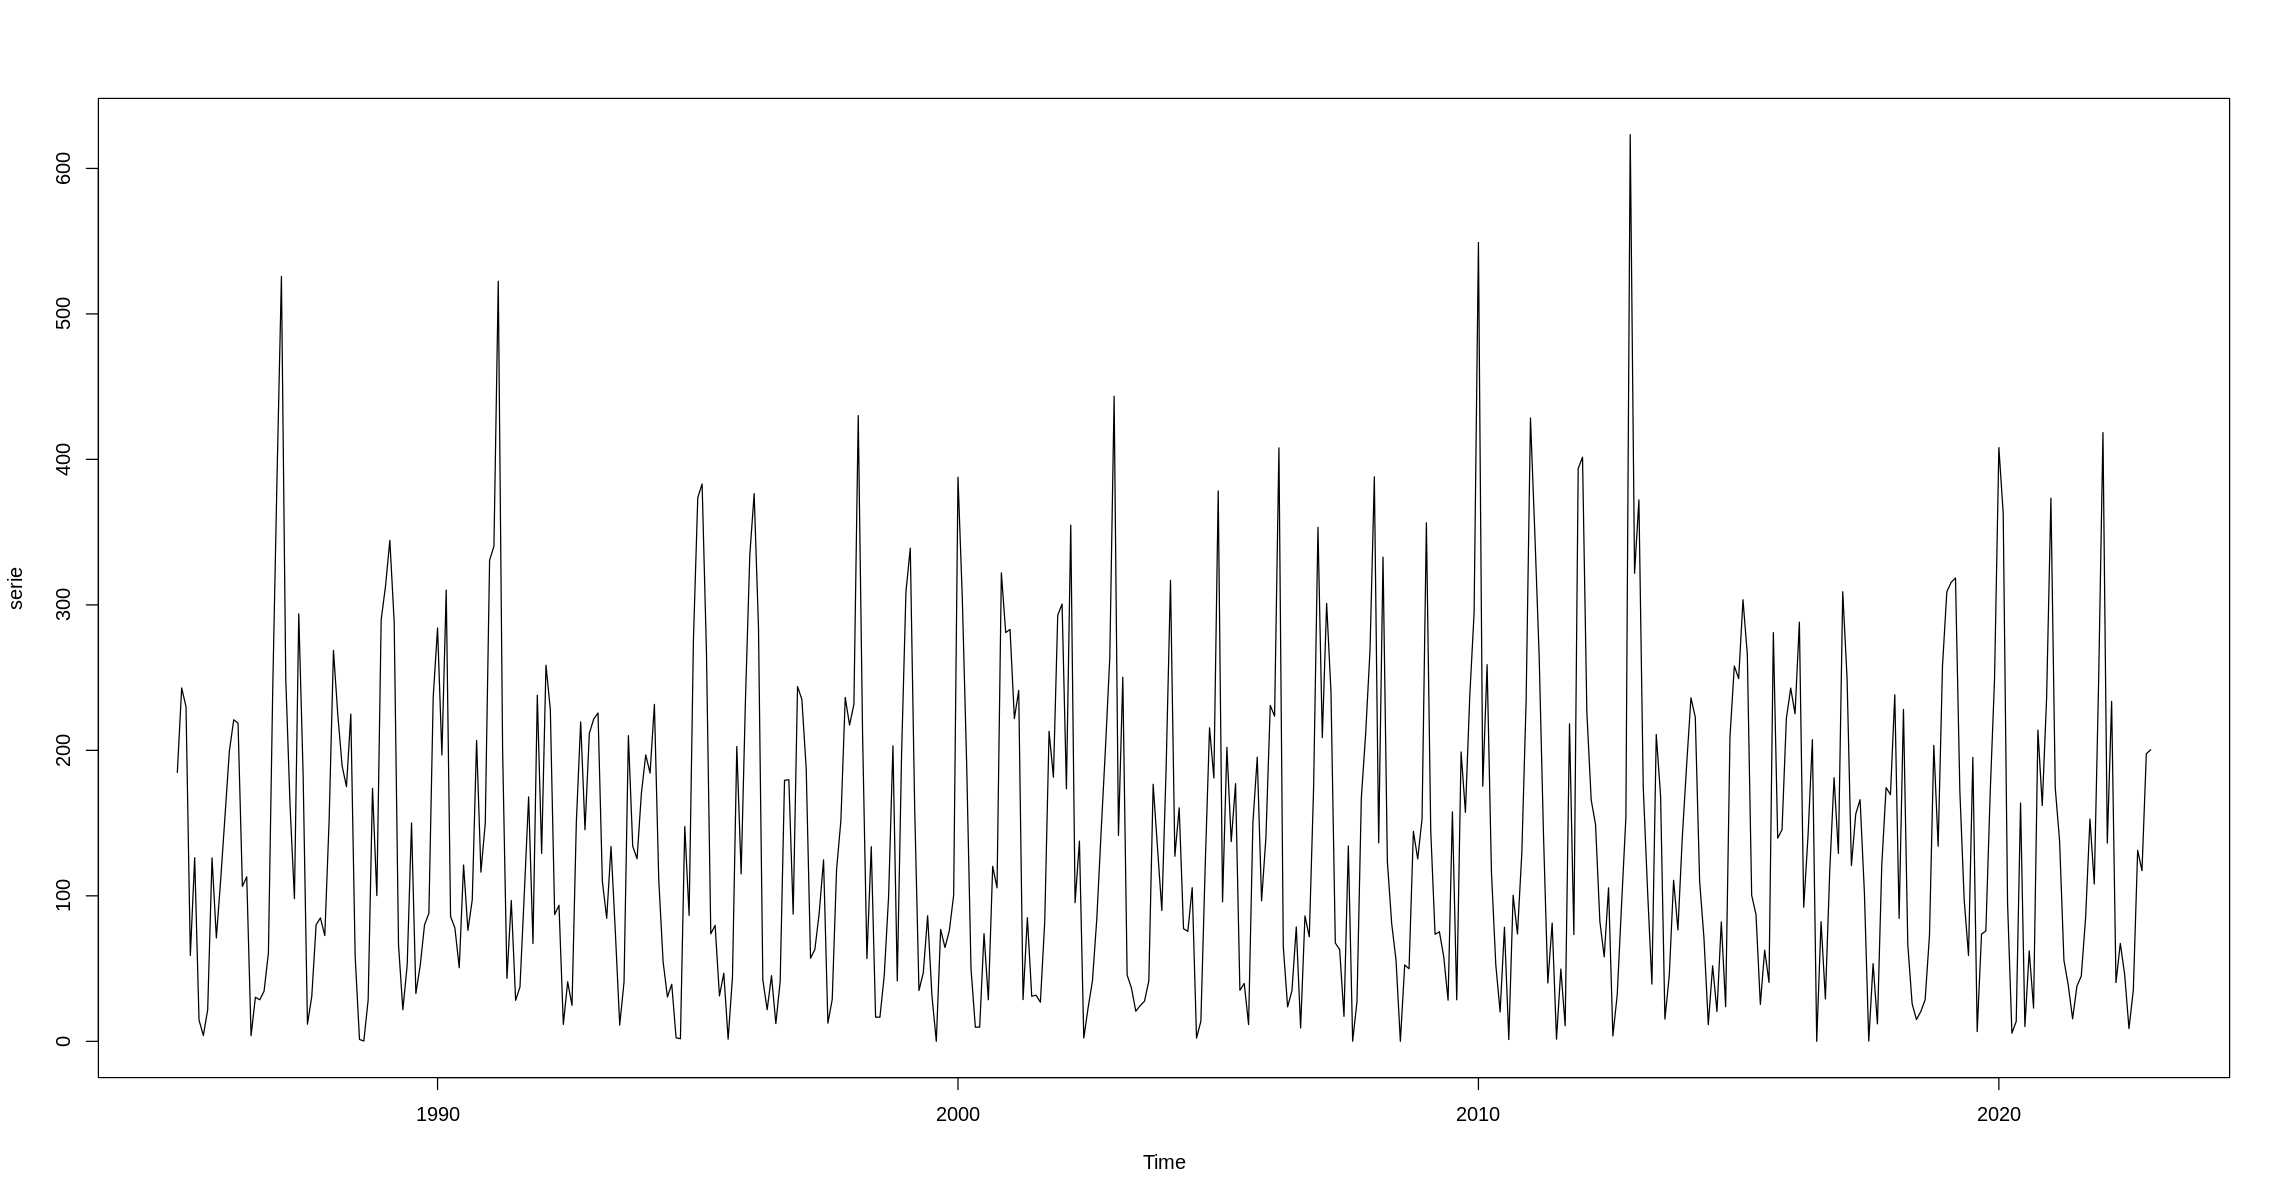

In [ ]:
plot(serie)

#####3.3-ANÁLISE DETALHADA DA SÉRIE E NOVAS TRANSFORMAÇÕES

#####3.3.1-CRIAÇÃO DA MÉDIA MÓVEL

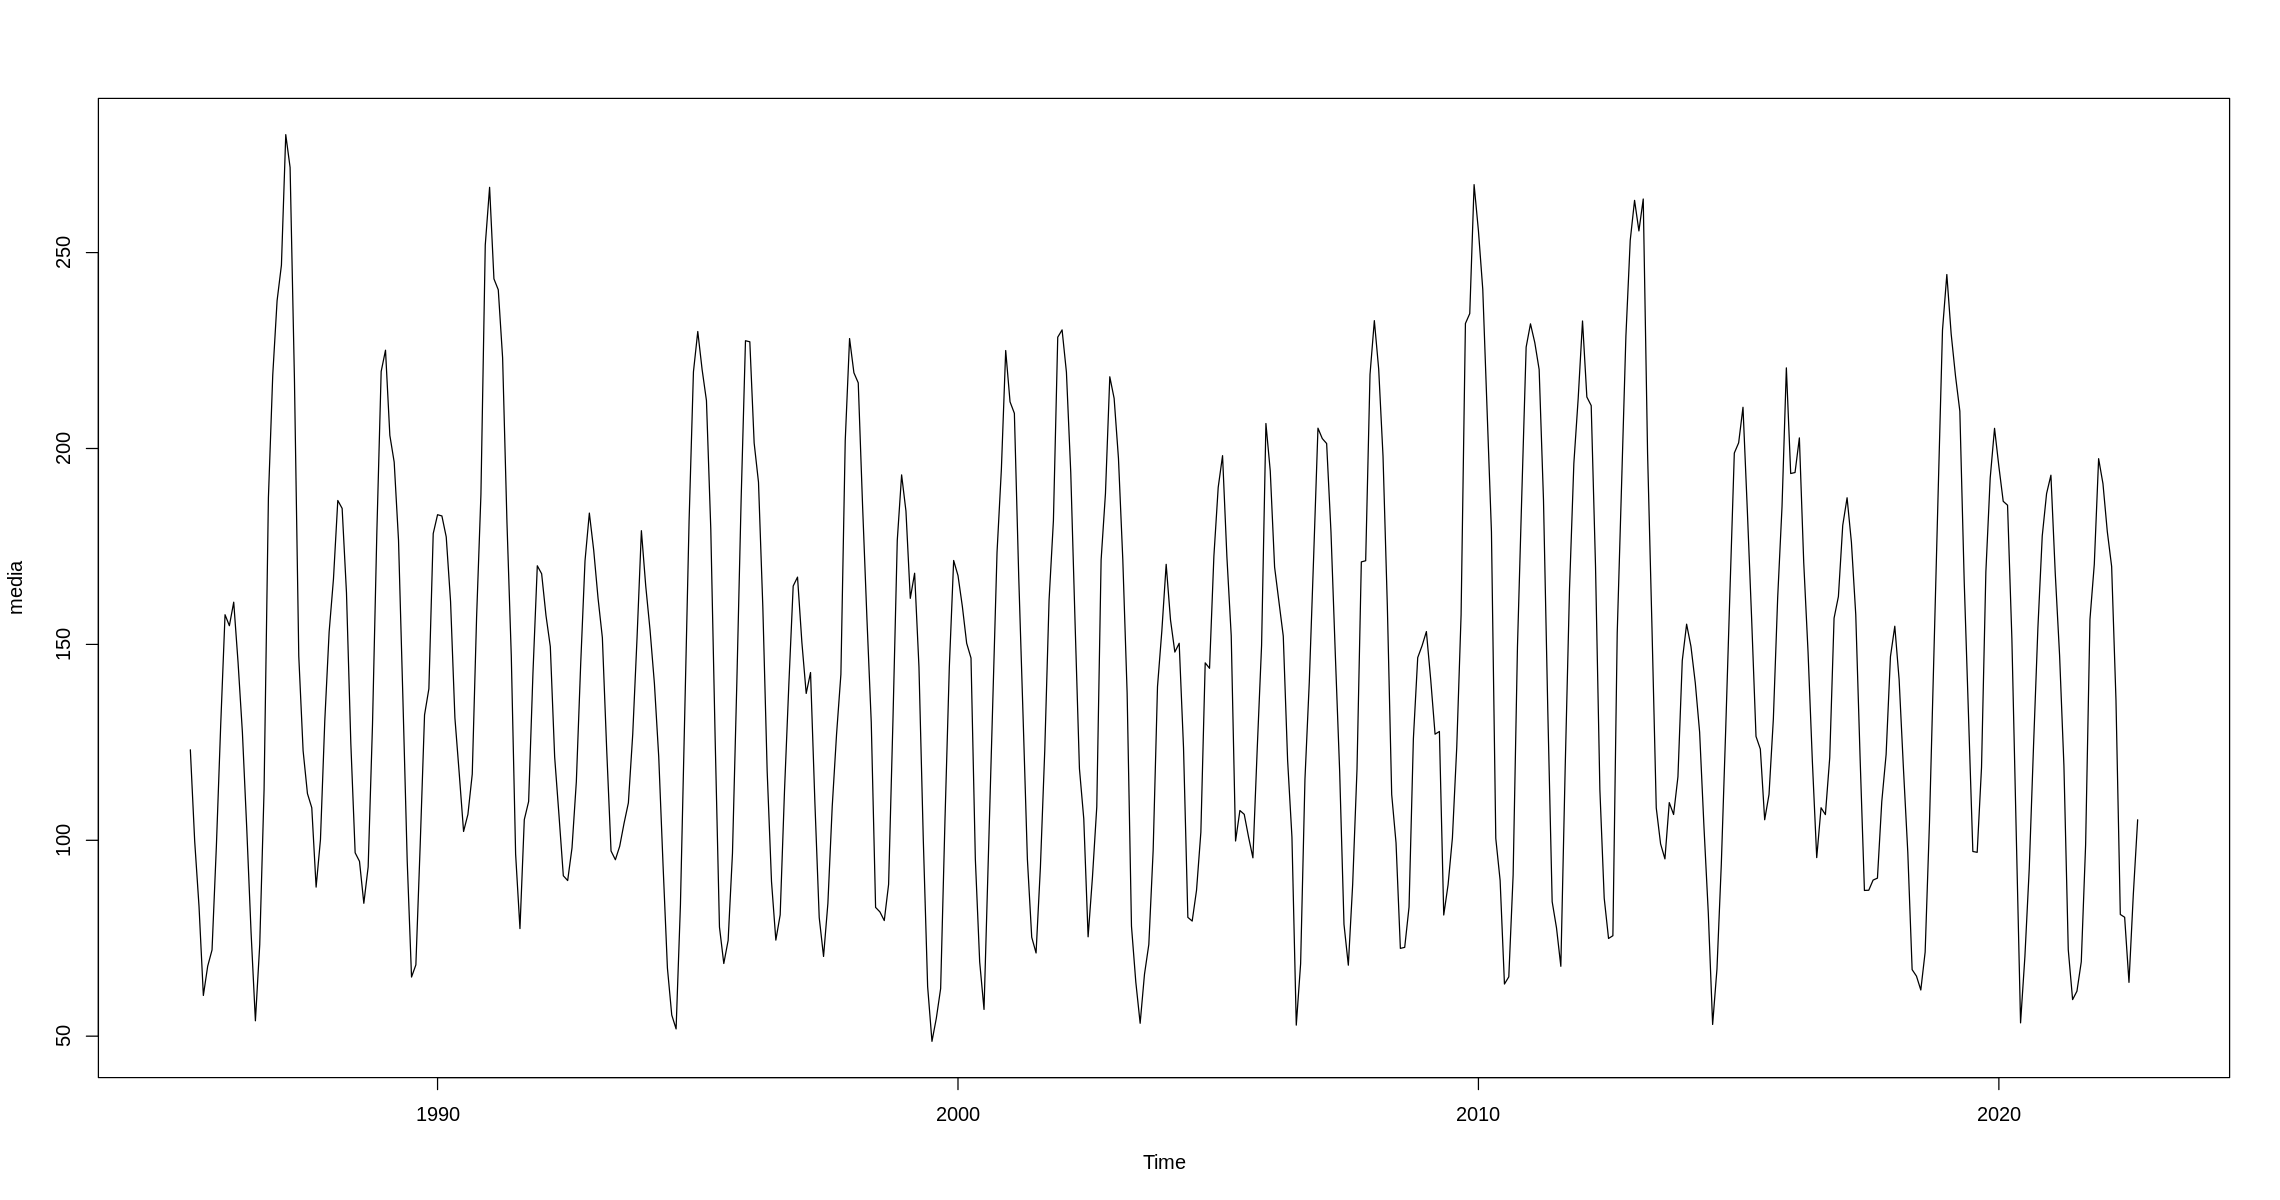

In [ ]:
#MÉDIA MÓVEL SIMPLES CENTRALIZADA
media<-
  ma(serie, order=7, centre = TRUE)
plot(media)

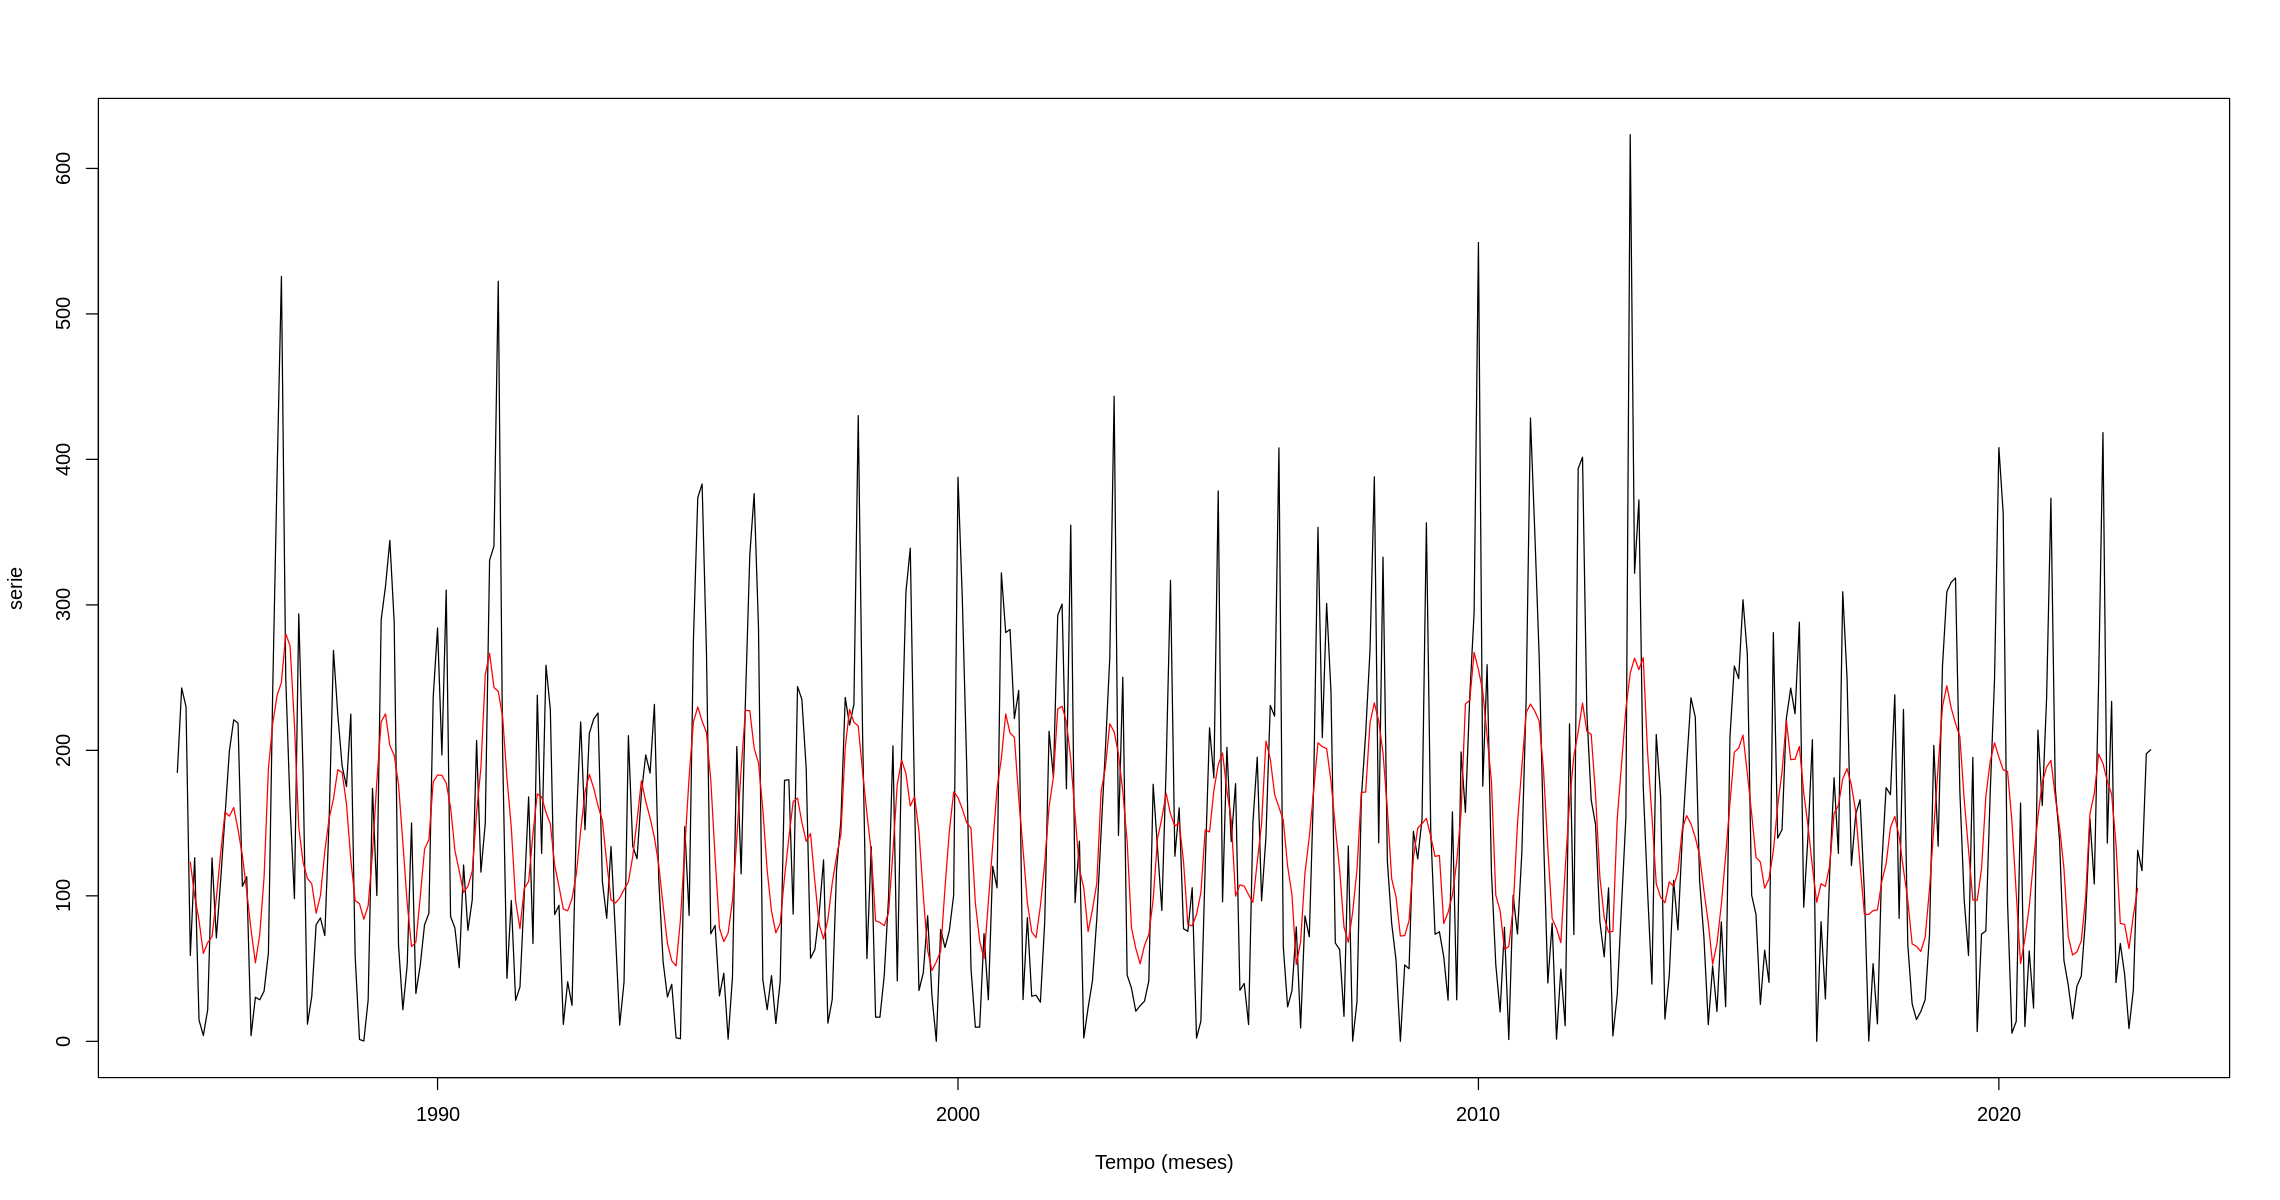

In [ ]:
#plotando a média com a série
plot(serie, xlab = "Tempo (meses)", col = "black")
lines(media, col="red")

In [ ]:
# A MÉDIA MÓVEL SUAVIZA OS PICOS DA SÉRIE

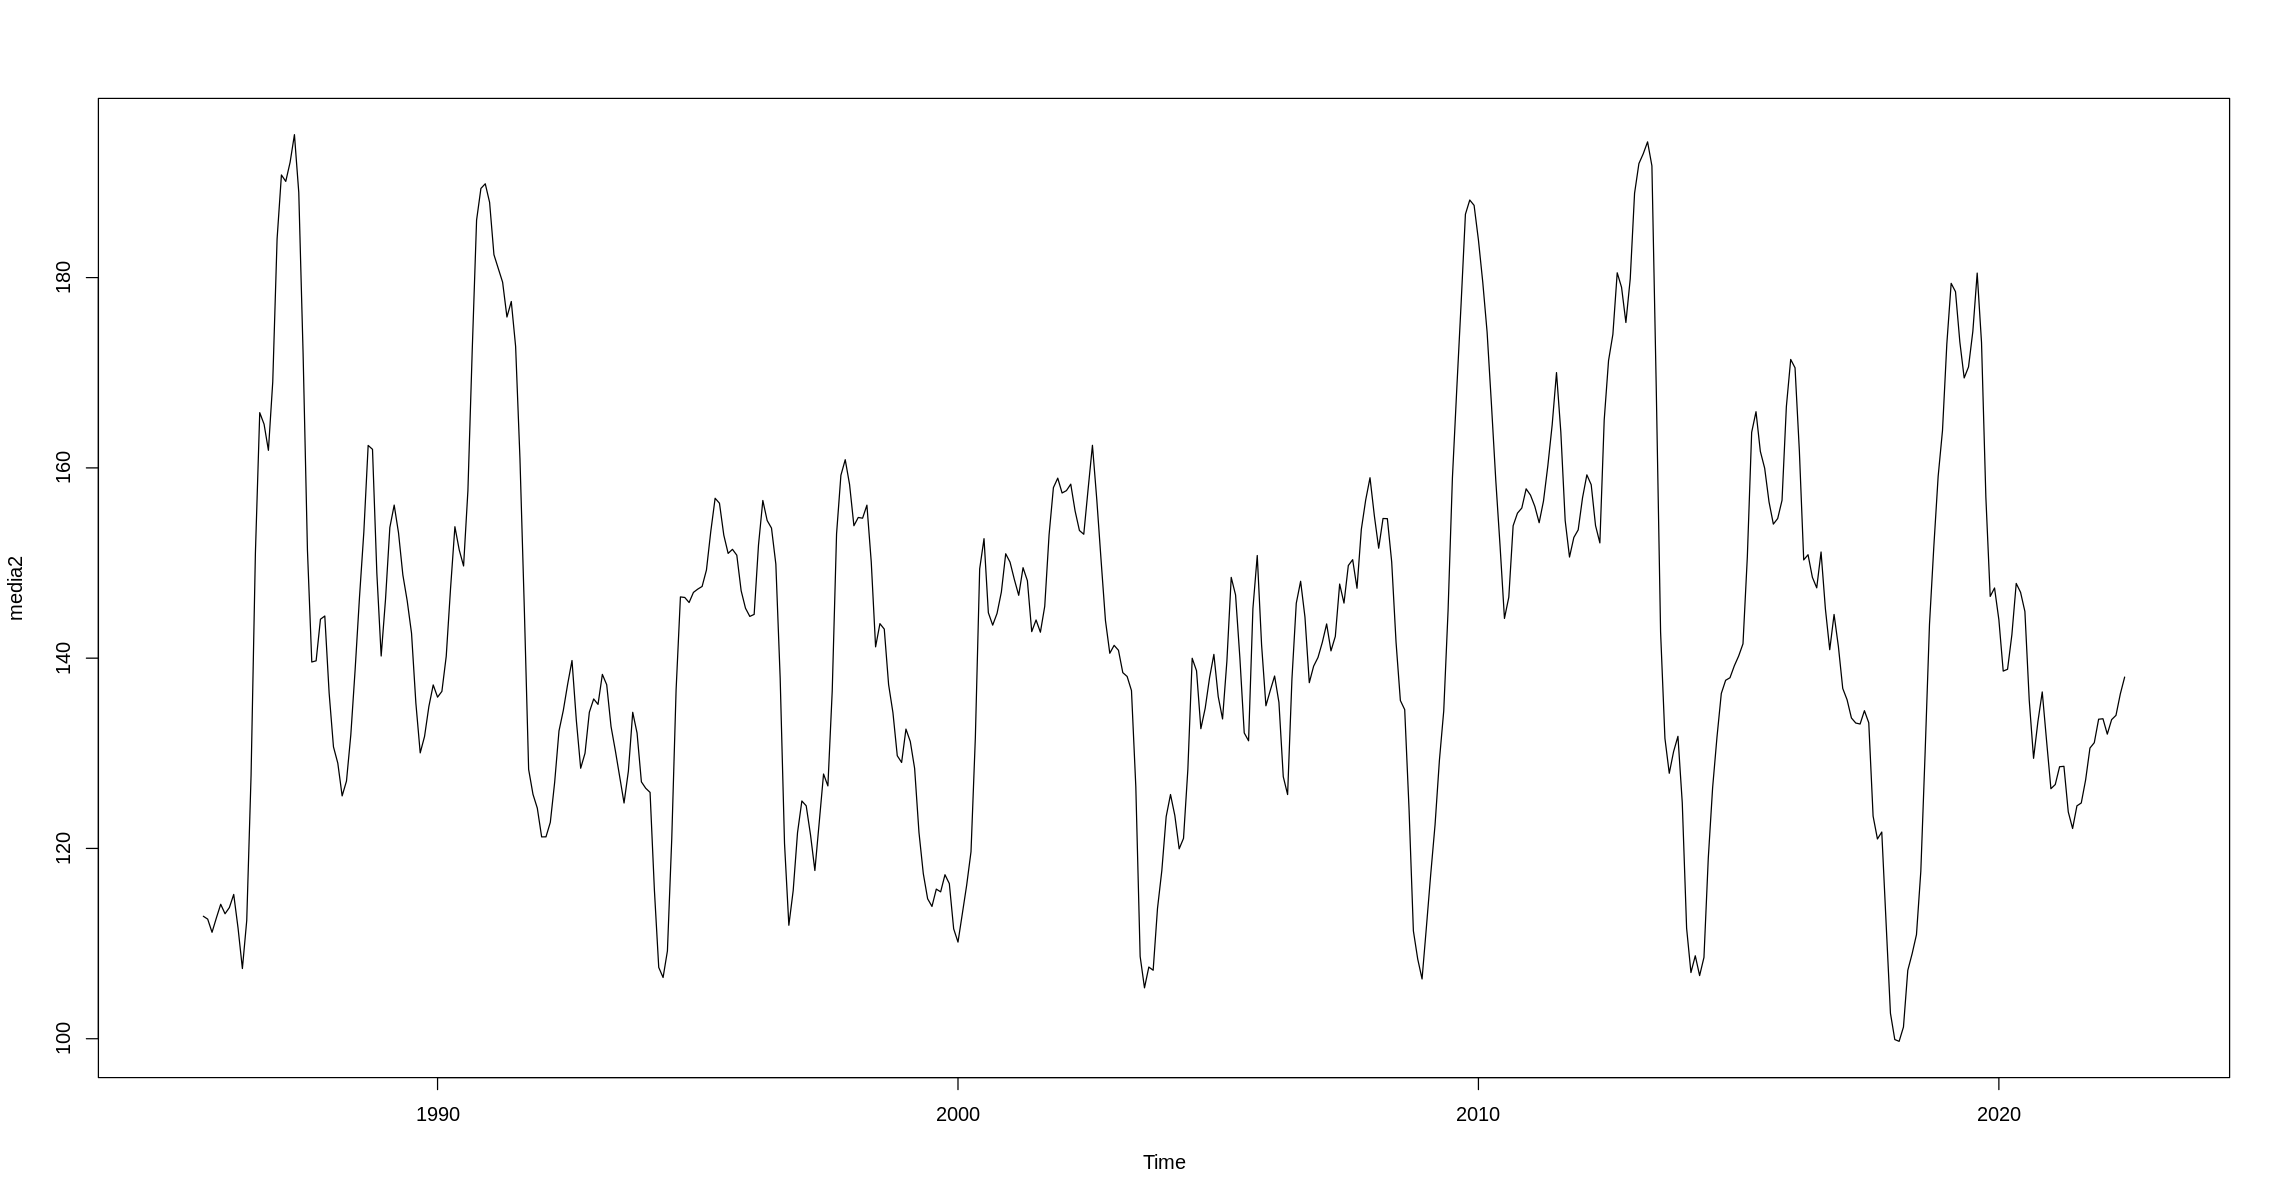

In [ ]:
#FAZENDO COM MAIS PERIODOS
media2<-
  ma(serie, order=12, centre = TRUE)
plot(media2)

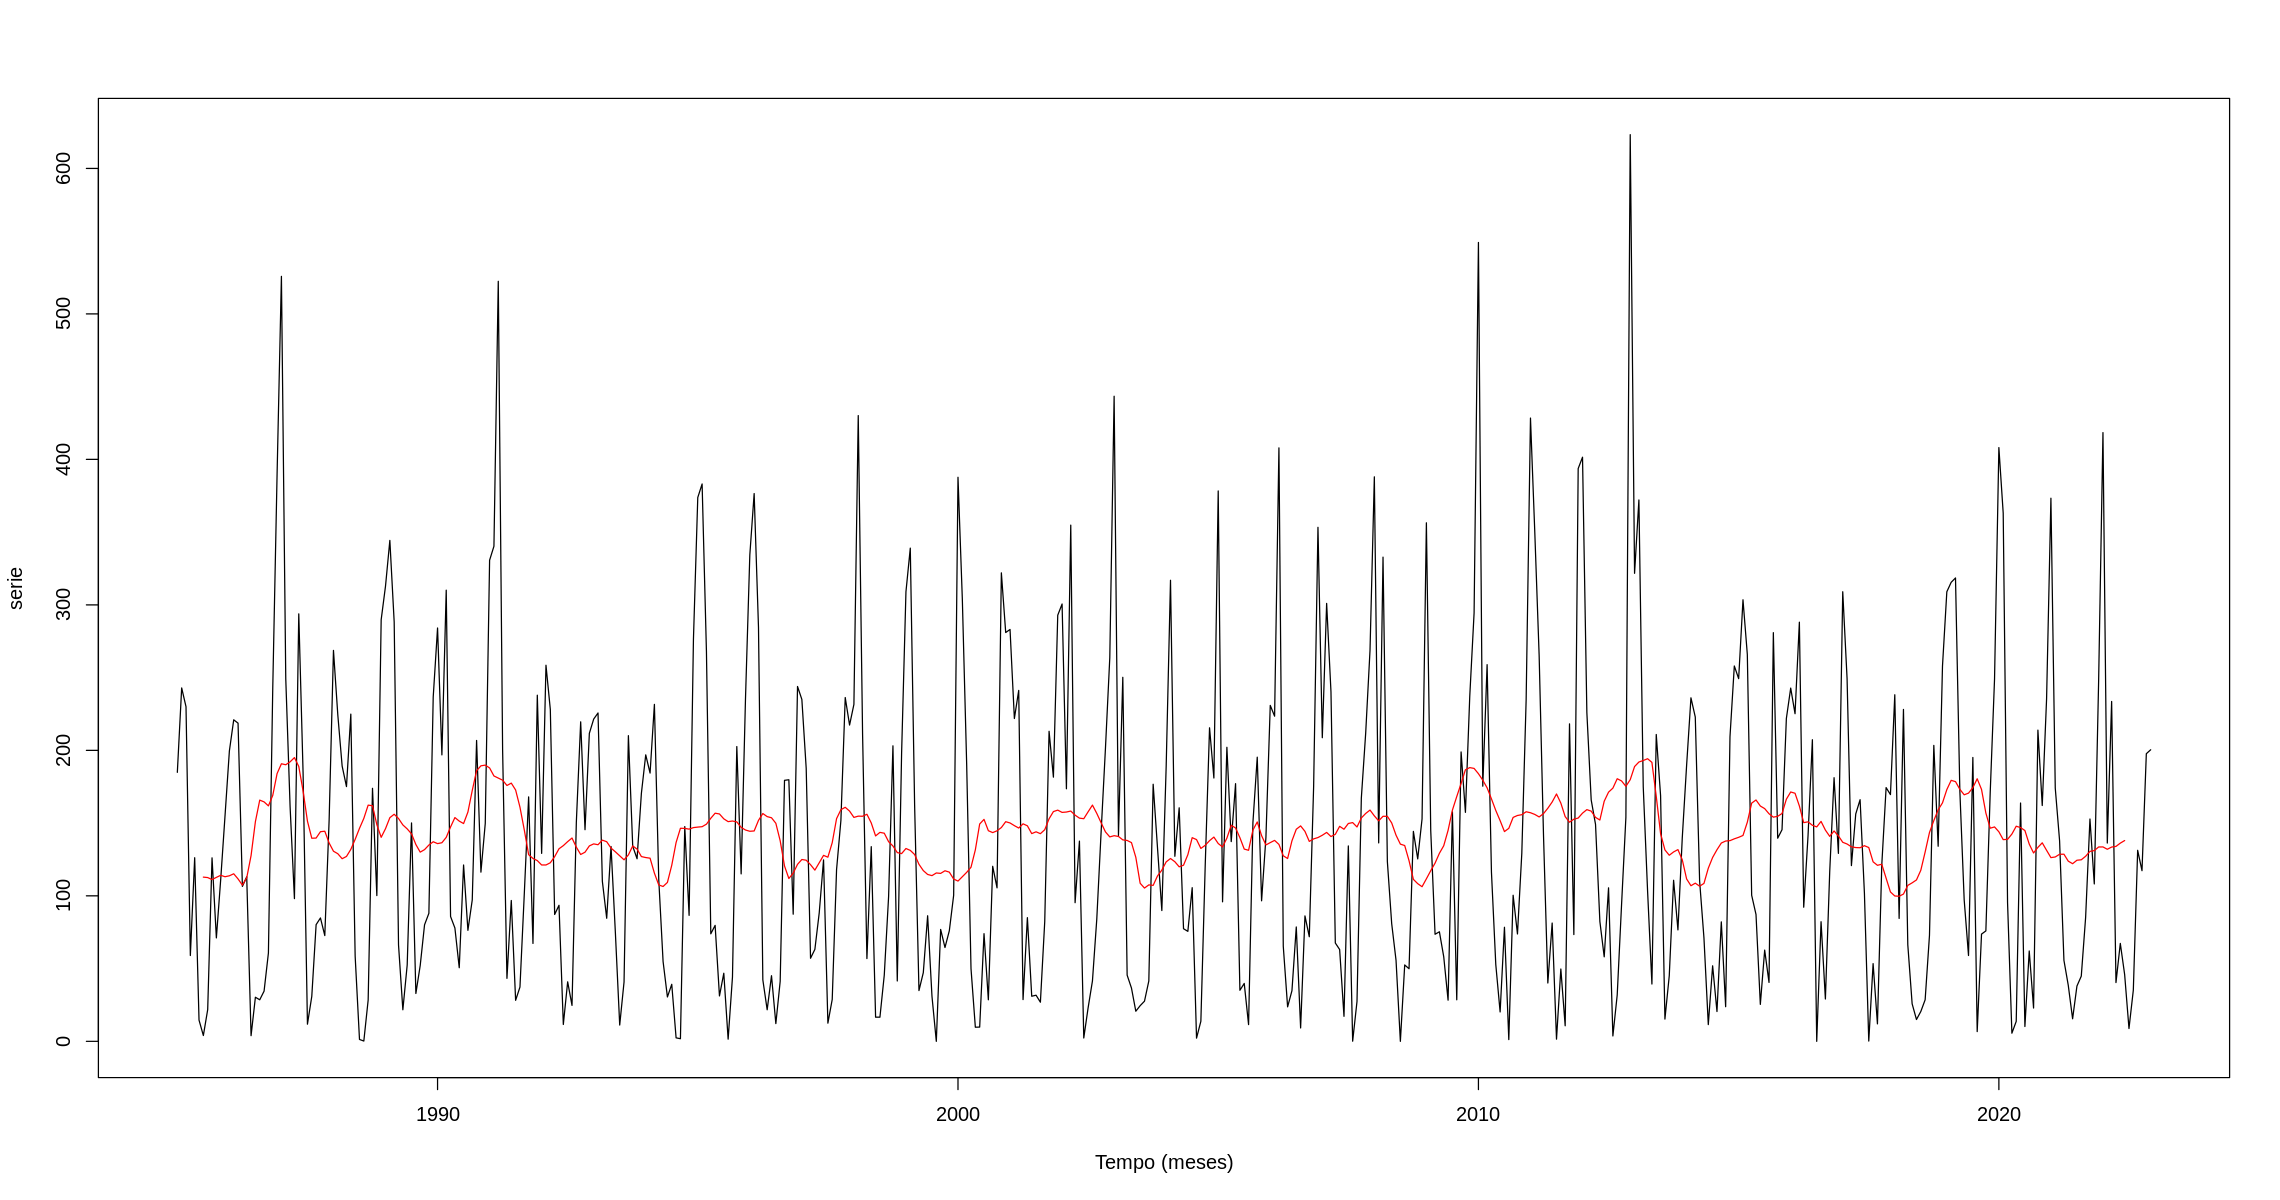

In [ ]:
#plotando a média com a série
plot(serie, xlab = "Tempo (meses)", col = "black")
lines(media2, col="red")

In [ ]:
# A MÉDIA COM 12 PERIODOS SUAVIOU MUITO MAS PERDEU MUITAS CARACTERÍSTICAS DOS DADOS

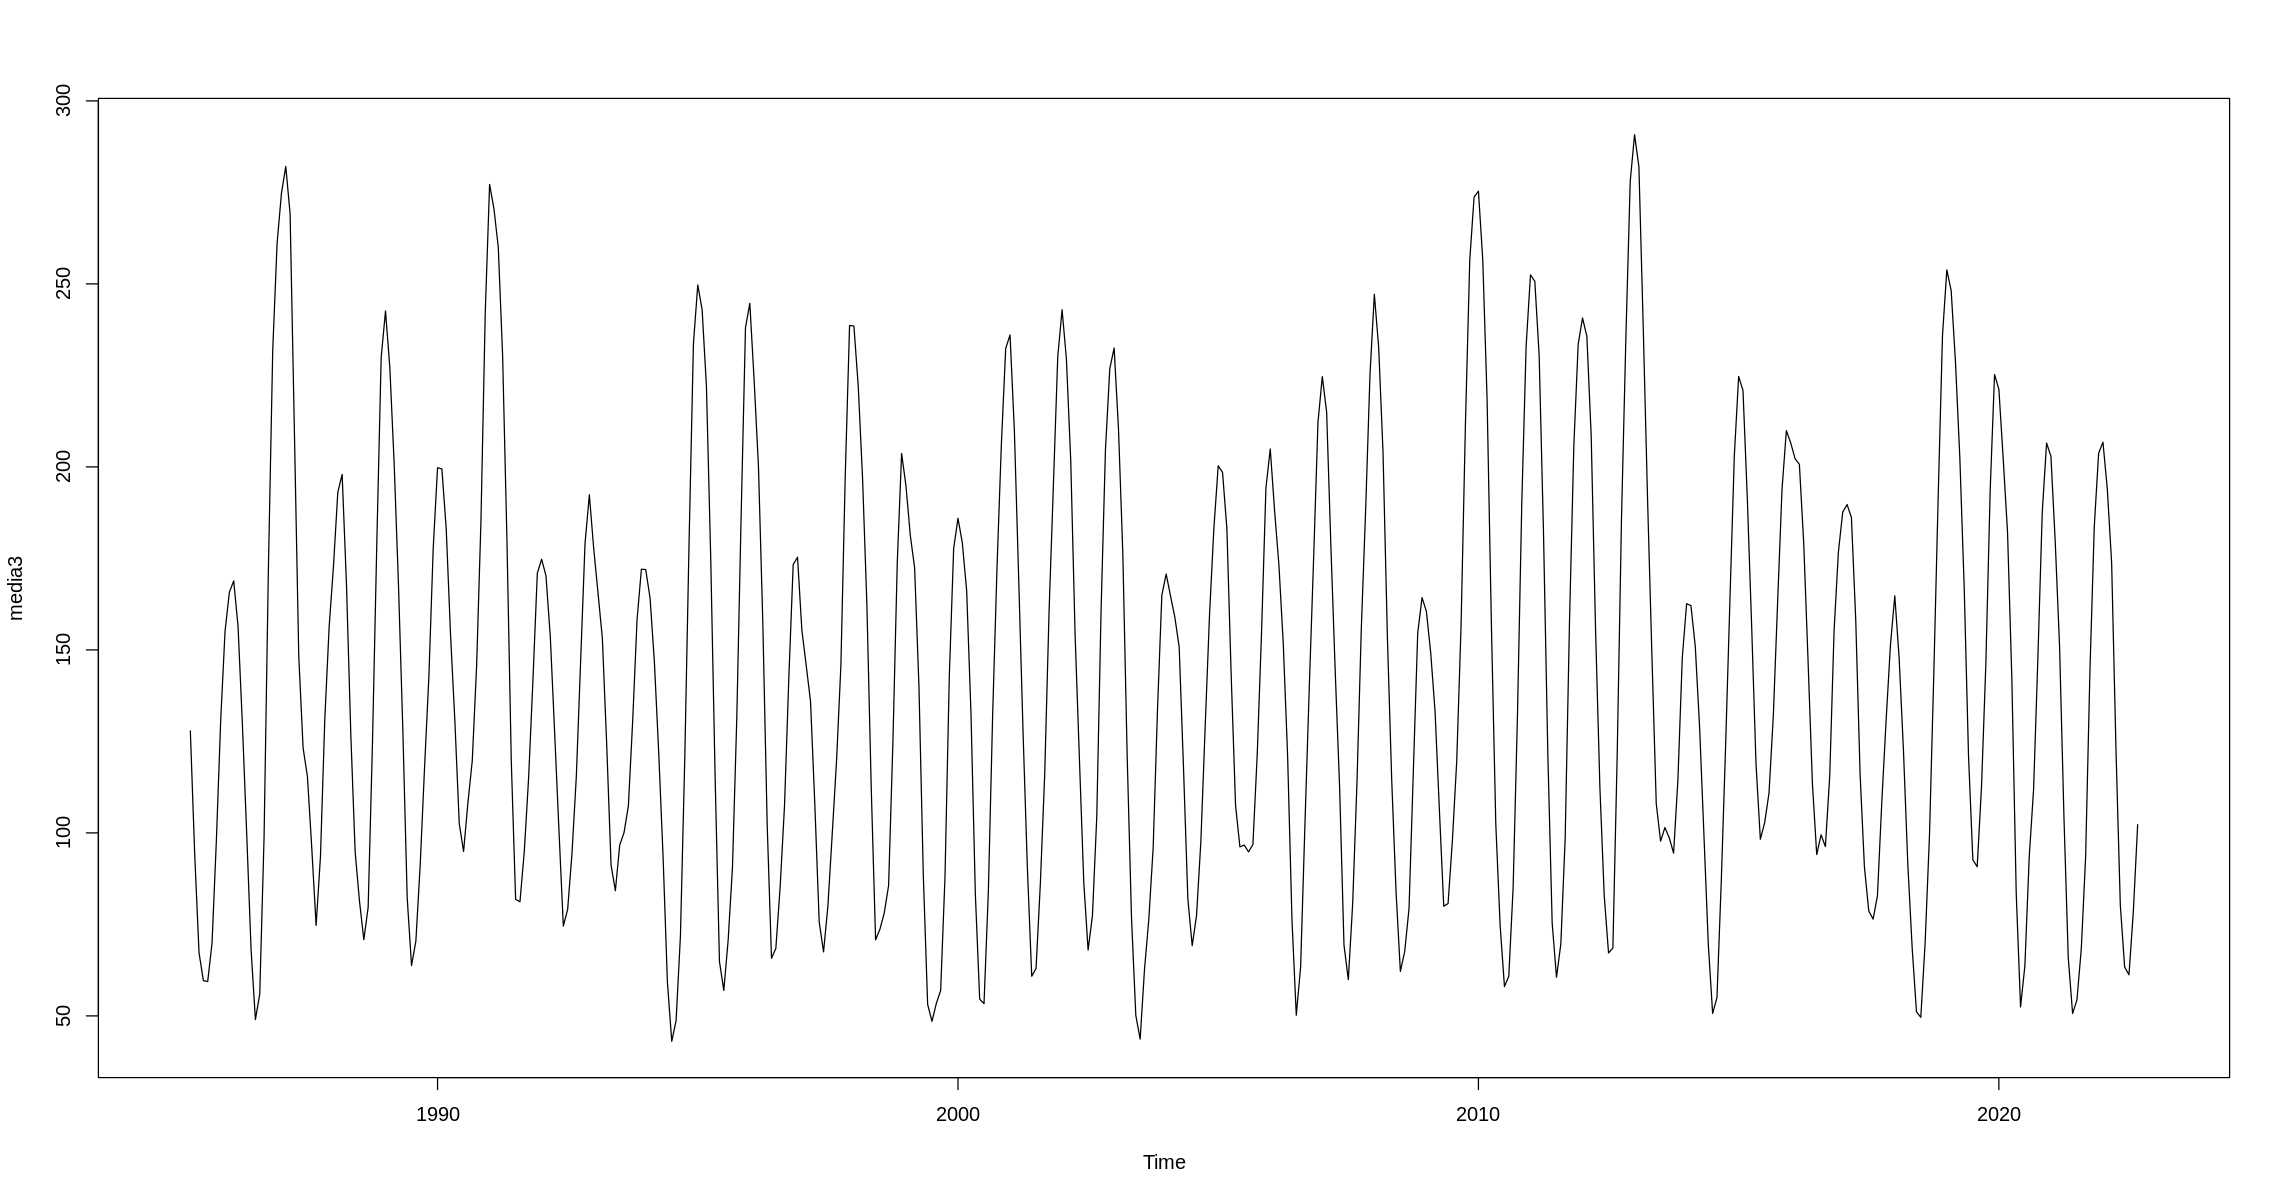

In [ ]:
#BAIXANDO PARA 6 PERÍODOS
media3<-
  ma(serie, order=6, centre = TRUE)
plot(media3)

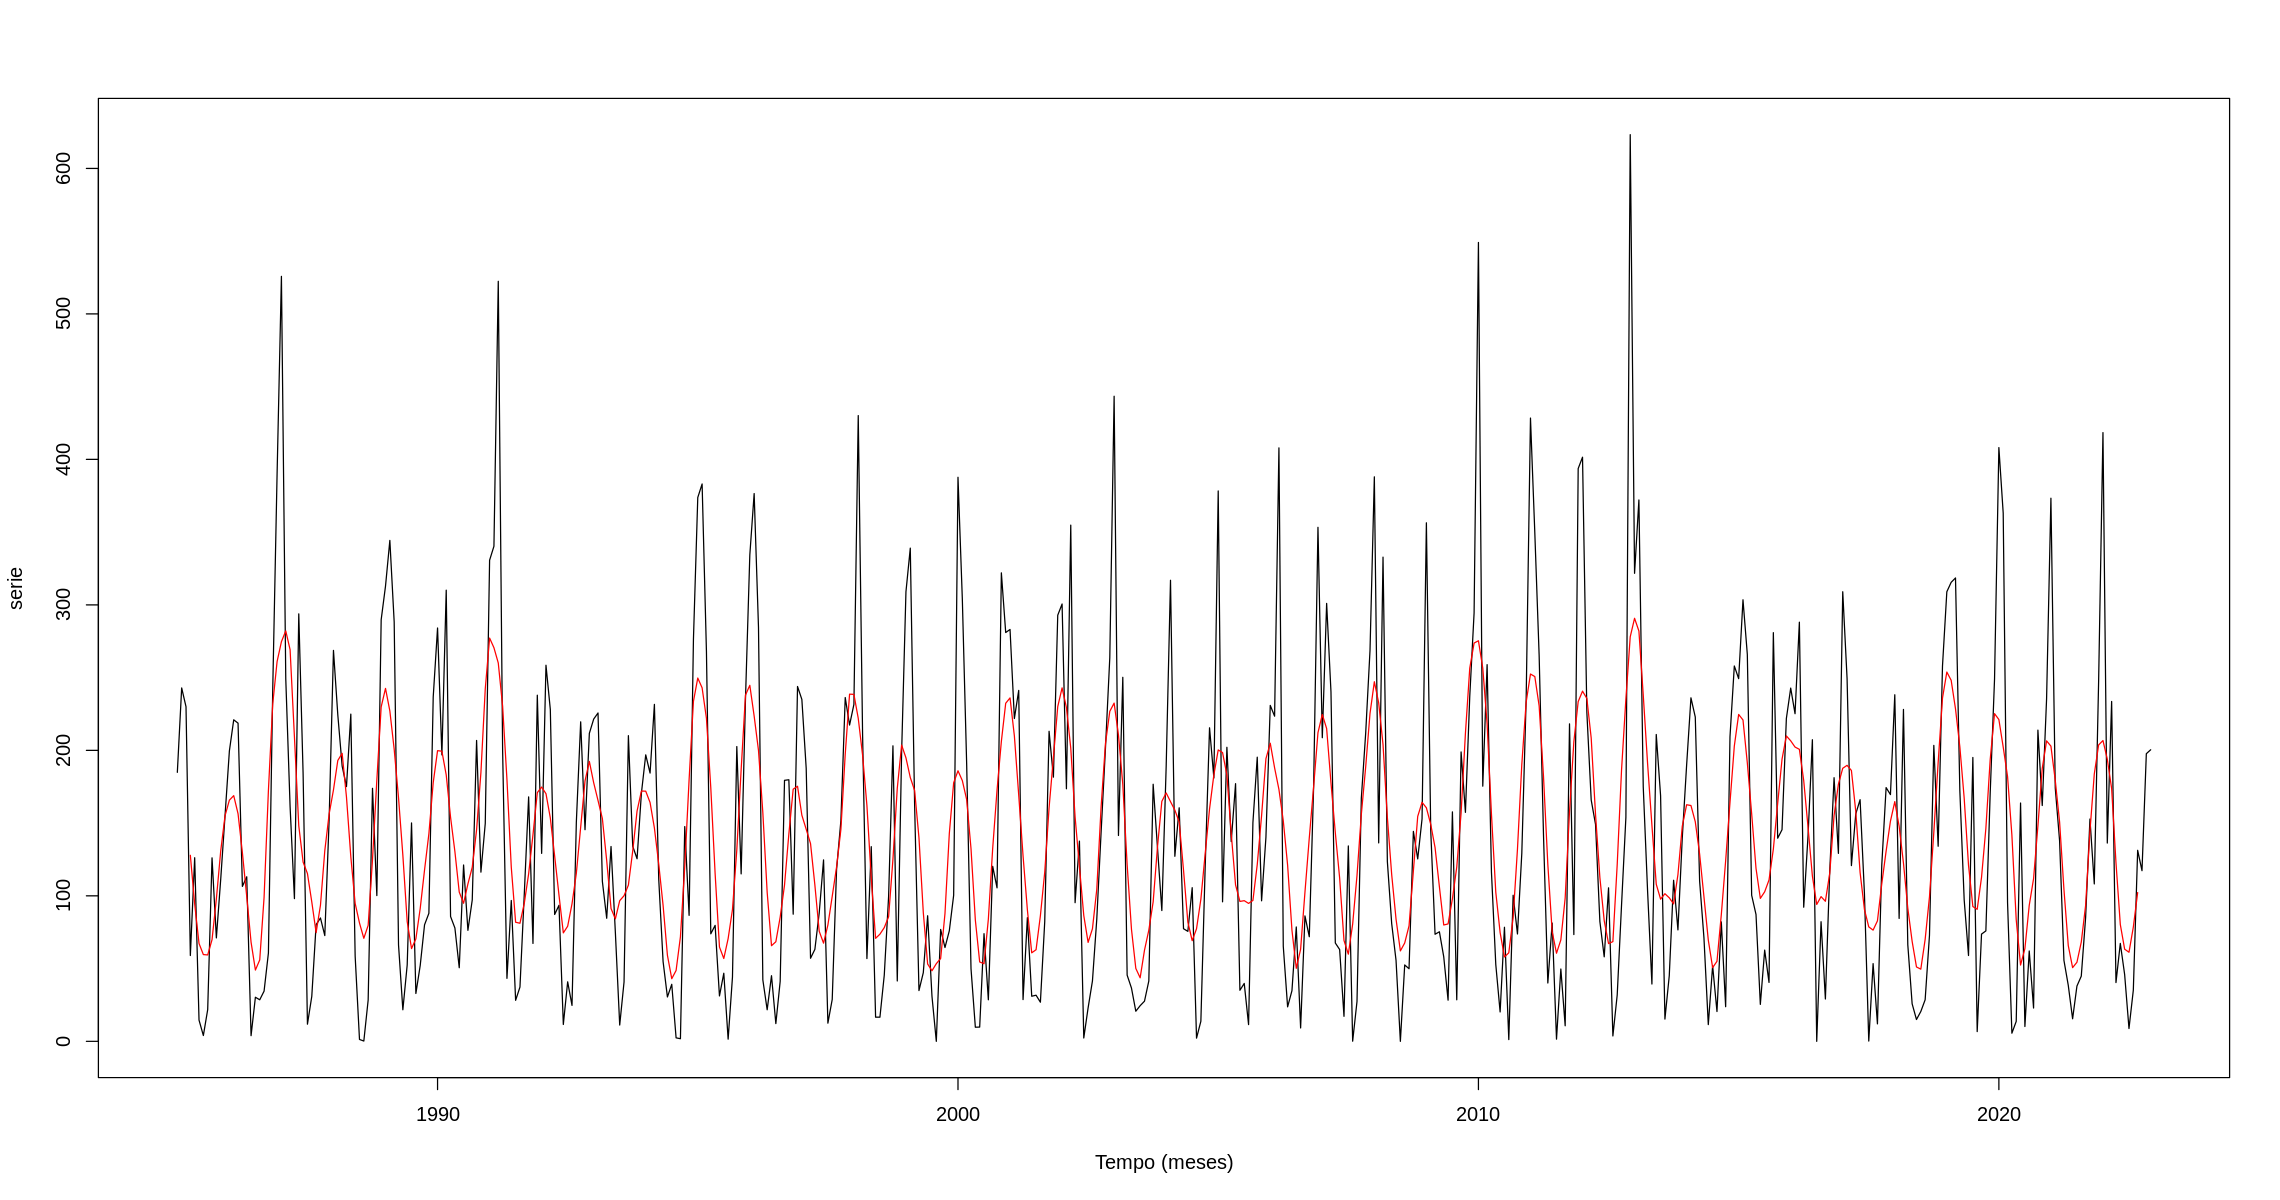

In [ ]:
#plotando a média com a série
plot(serie, xlab = "Tempo (meses)", col = "black")
lines(media3, col="red")

In [ ]:
#A MÉDIA COM 6 PERÍODOS FICOU BEM MELHOR

#####3.3.2-DECOMPOSIÇÃO DA SÉRIE

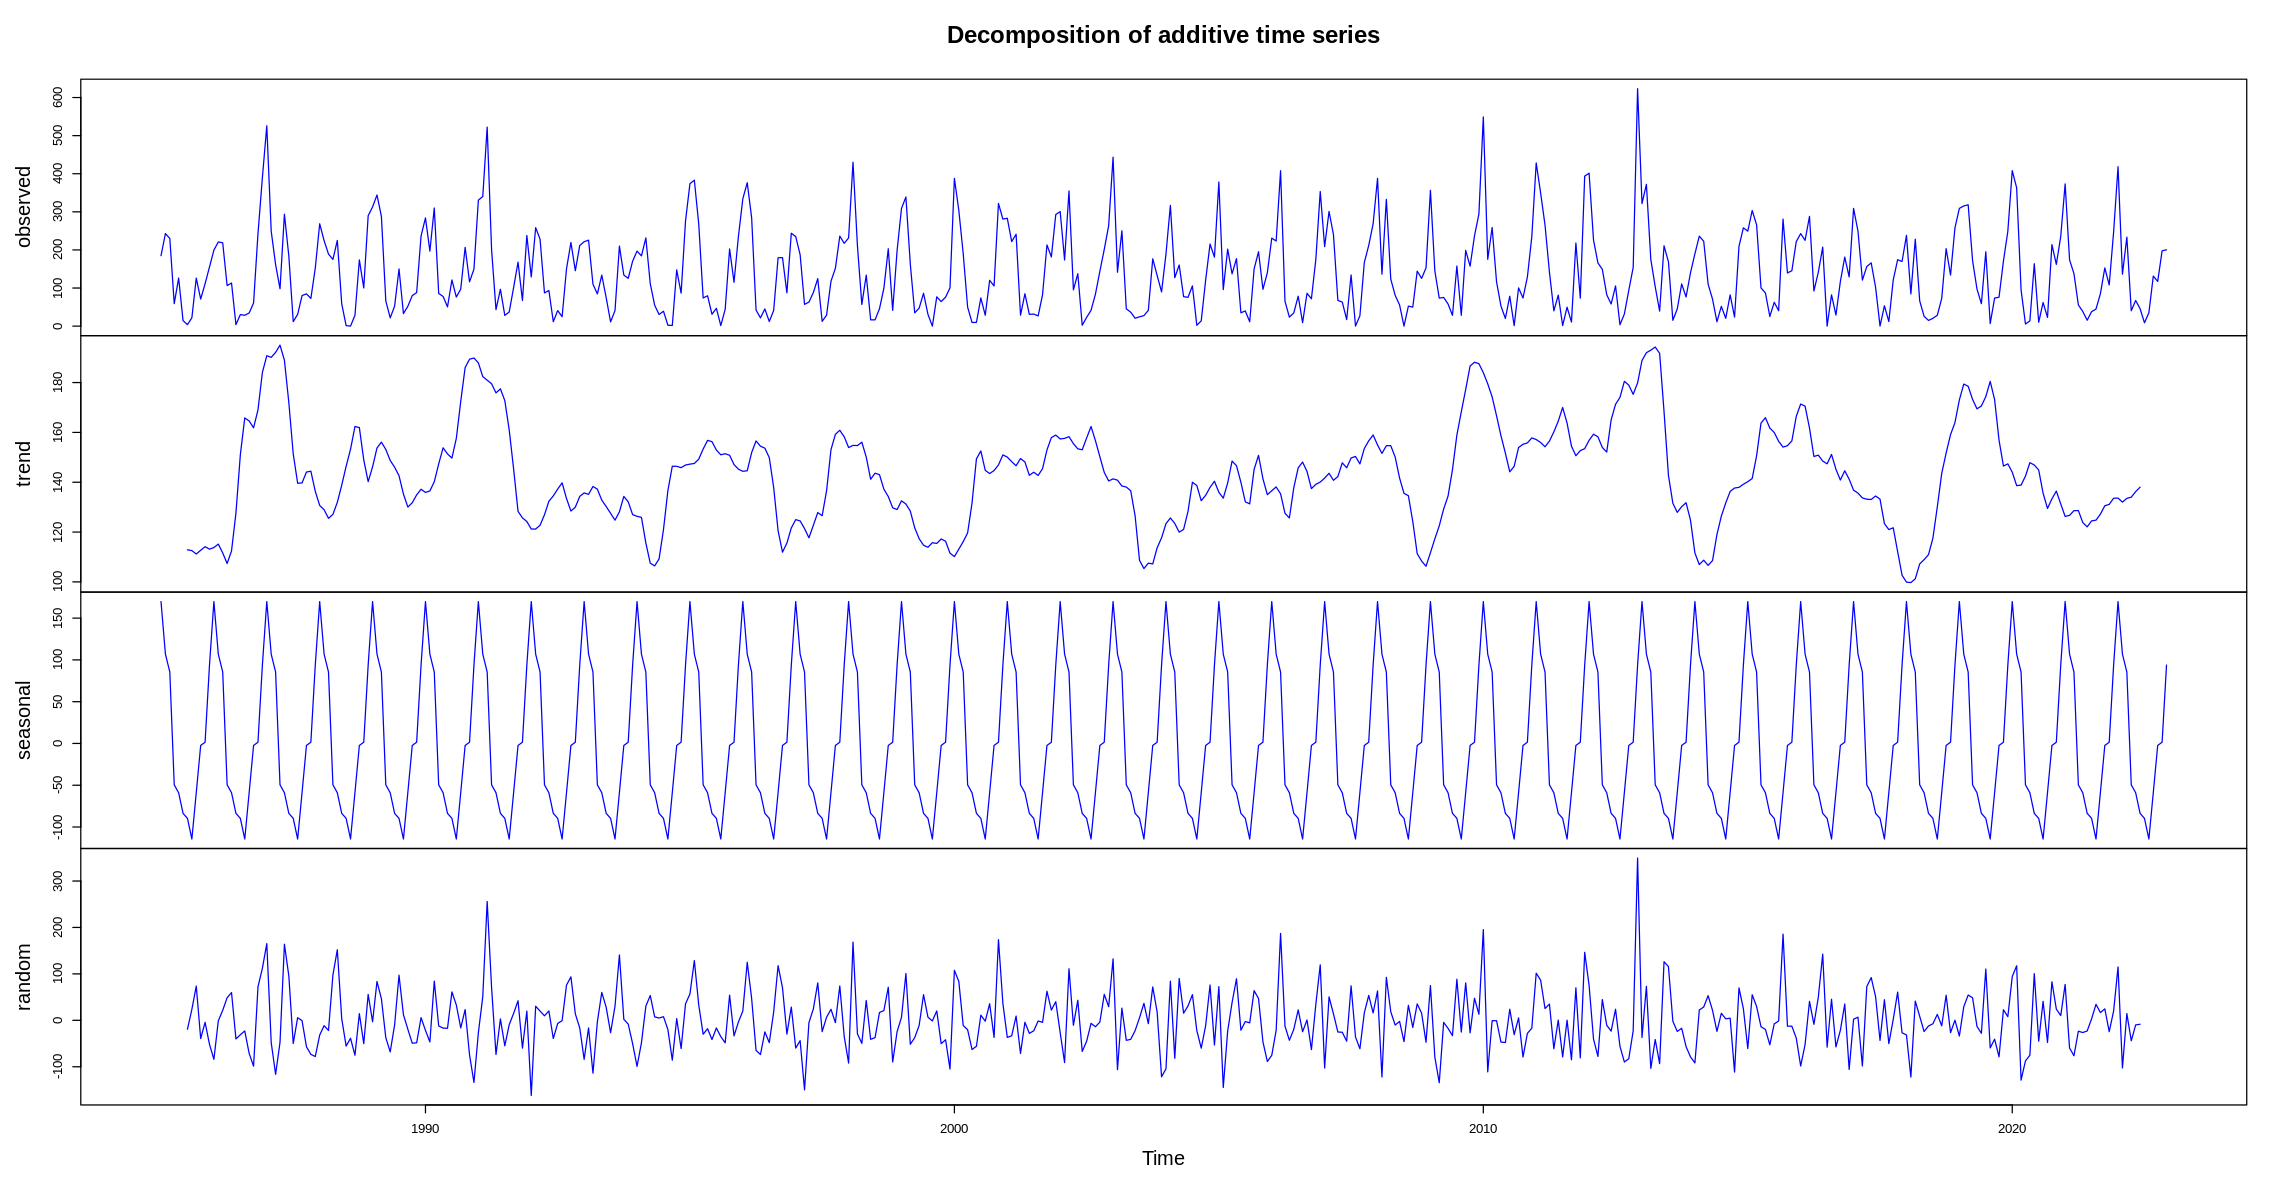

In [ ]:
#VERIFICAÇÃO DA TENDÊNCIA SAZONALIDADE E RUÍDOS
decomposicao<-
  decompose(serie)
plot(decomposicao, col='blue')

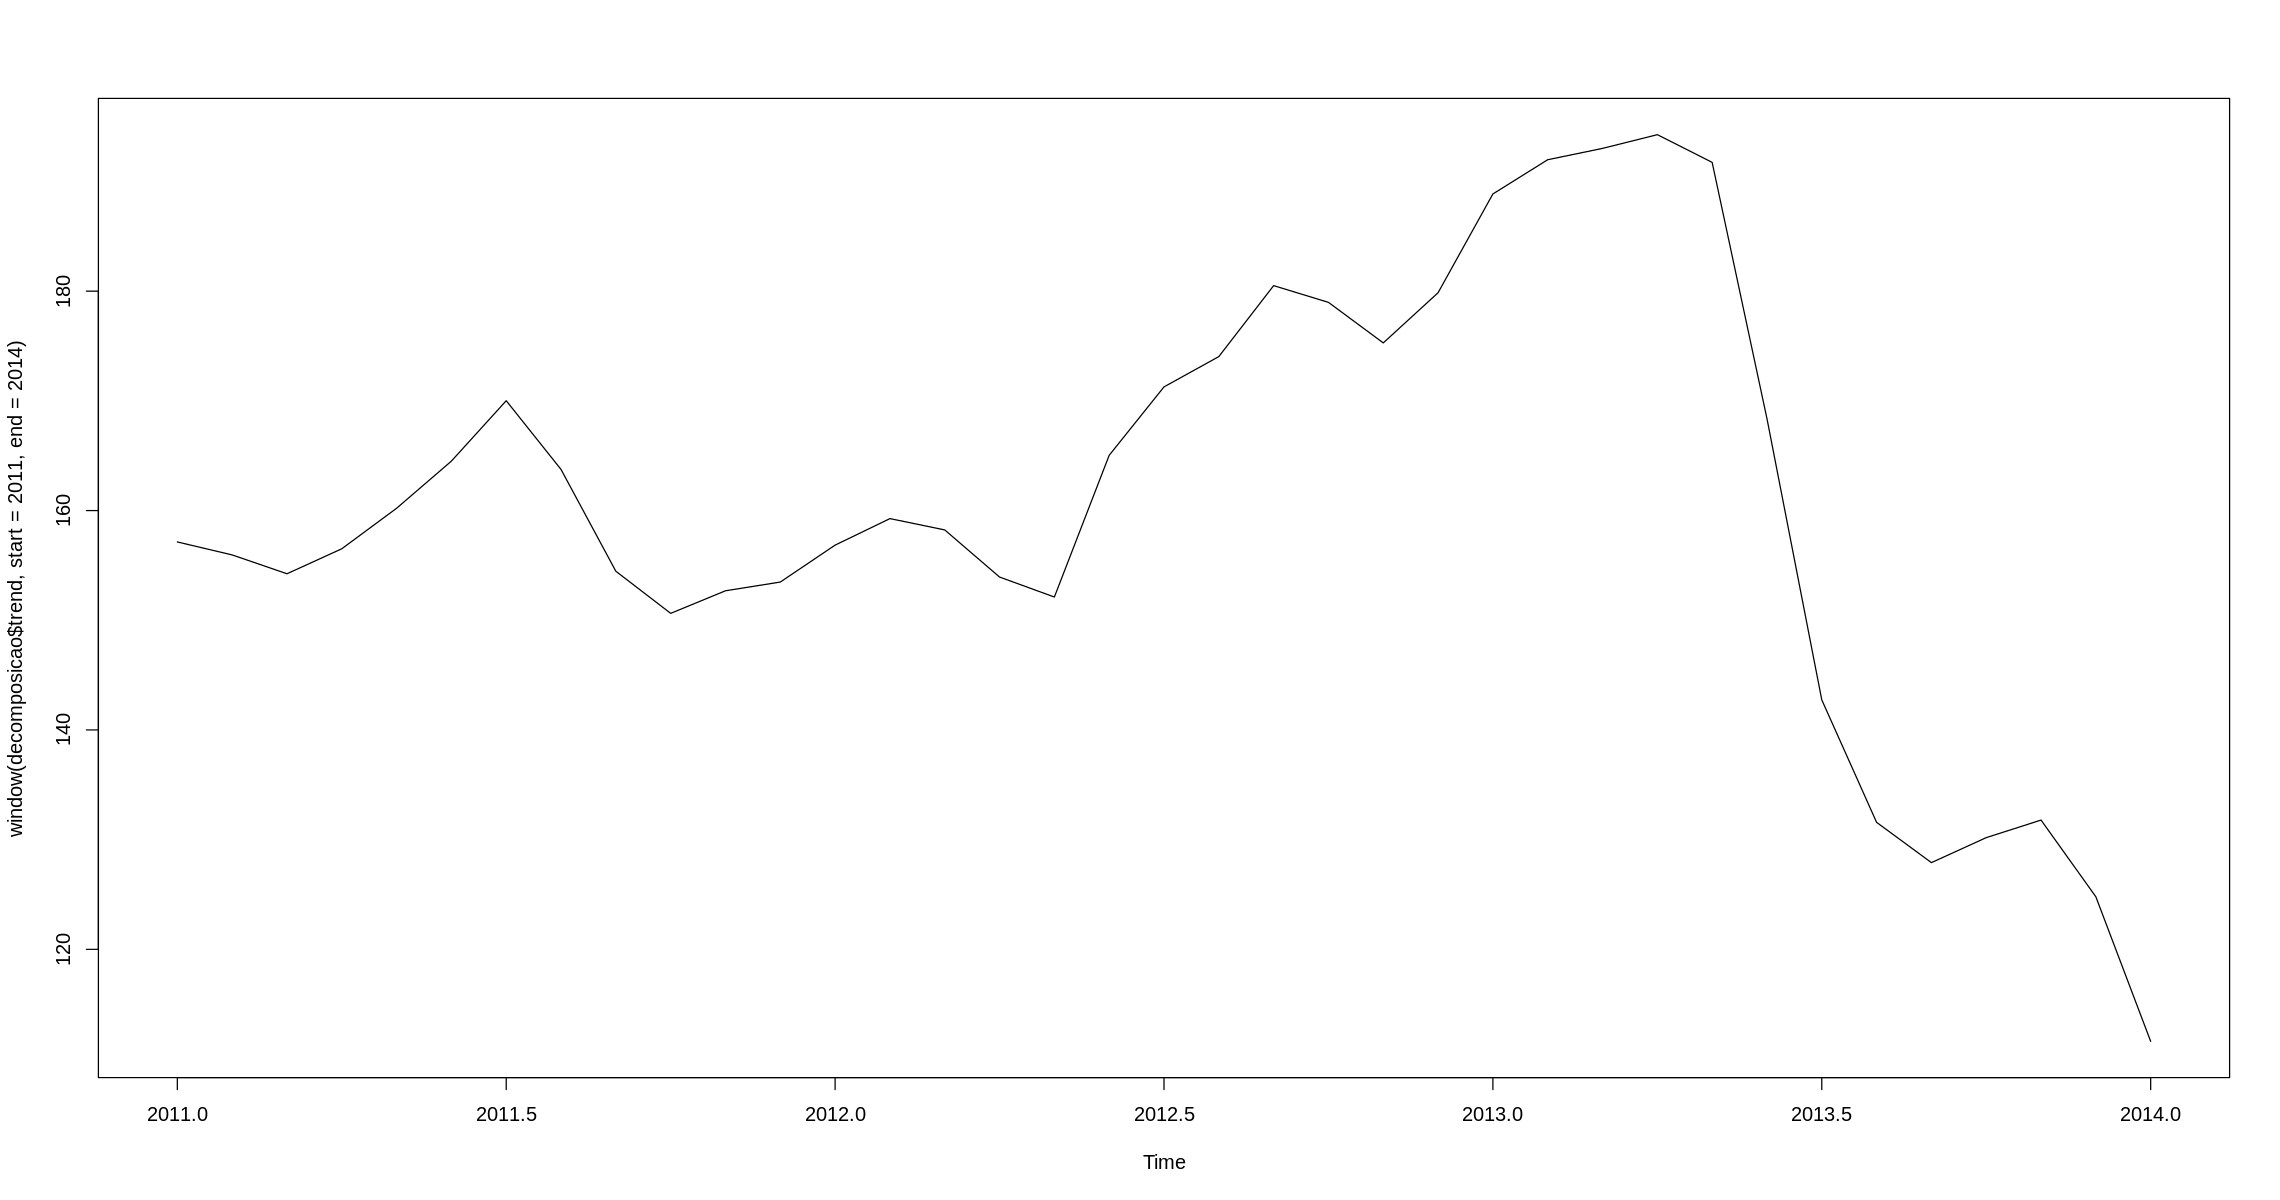

In [ ]:
#verificando a tendência a partir de 2011
plot(window(decomposicao$trend, start = 2011, end = 2014))

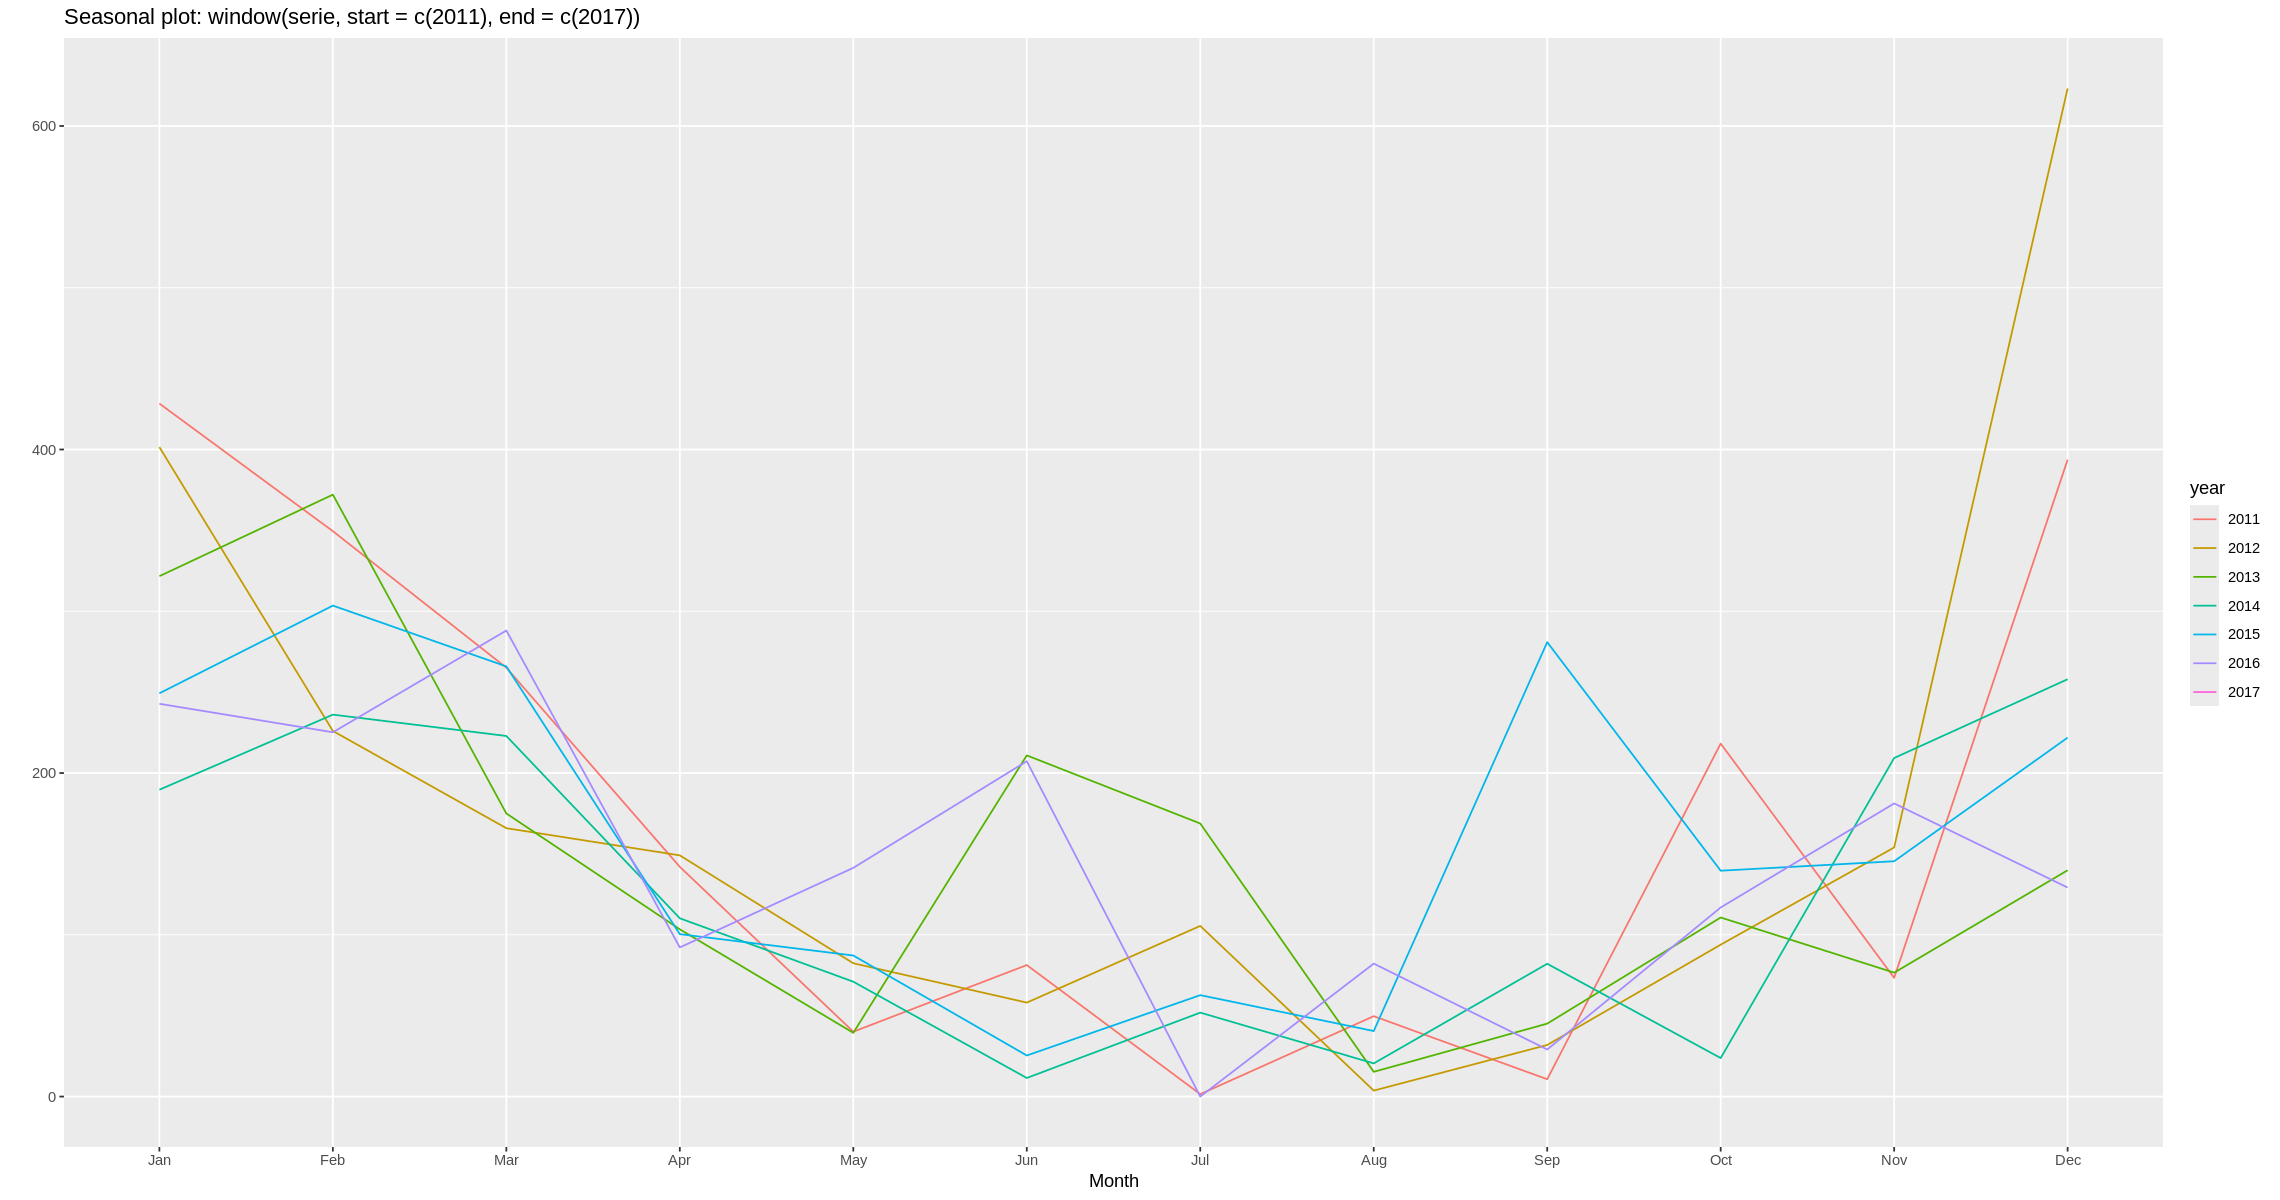

In [ ]:
#EFEITO SAZONAL POR ANO de 2011 a 2017
ggseasonplot(window(serie, start = c(2011), end = c(2017)))

#####3.3.3-SUAVIZAÇÃO DA SÉRIE

In [ ]:
#SUAVIZAÇÃO DA SÉRIE PARA TRATAR OS OUTLIERS

serie2<-
  tsclean(serie)

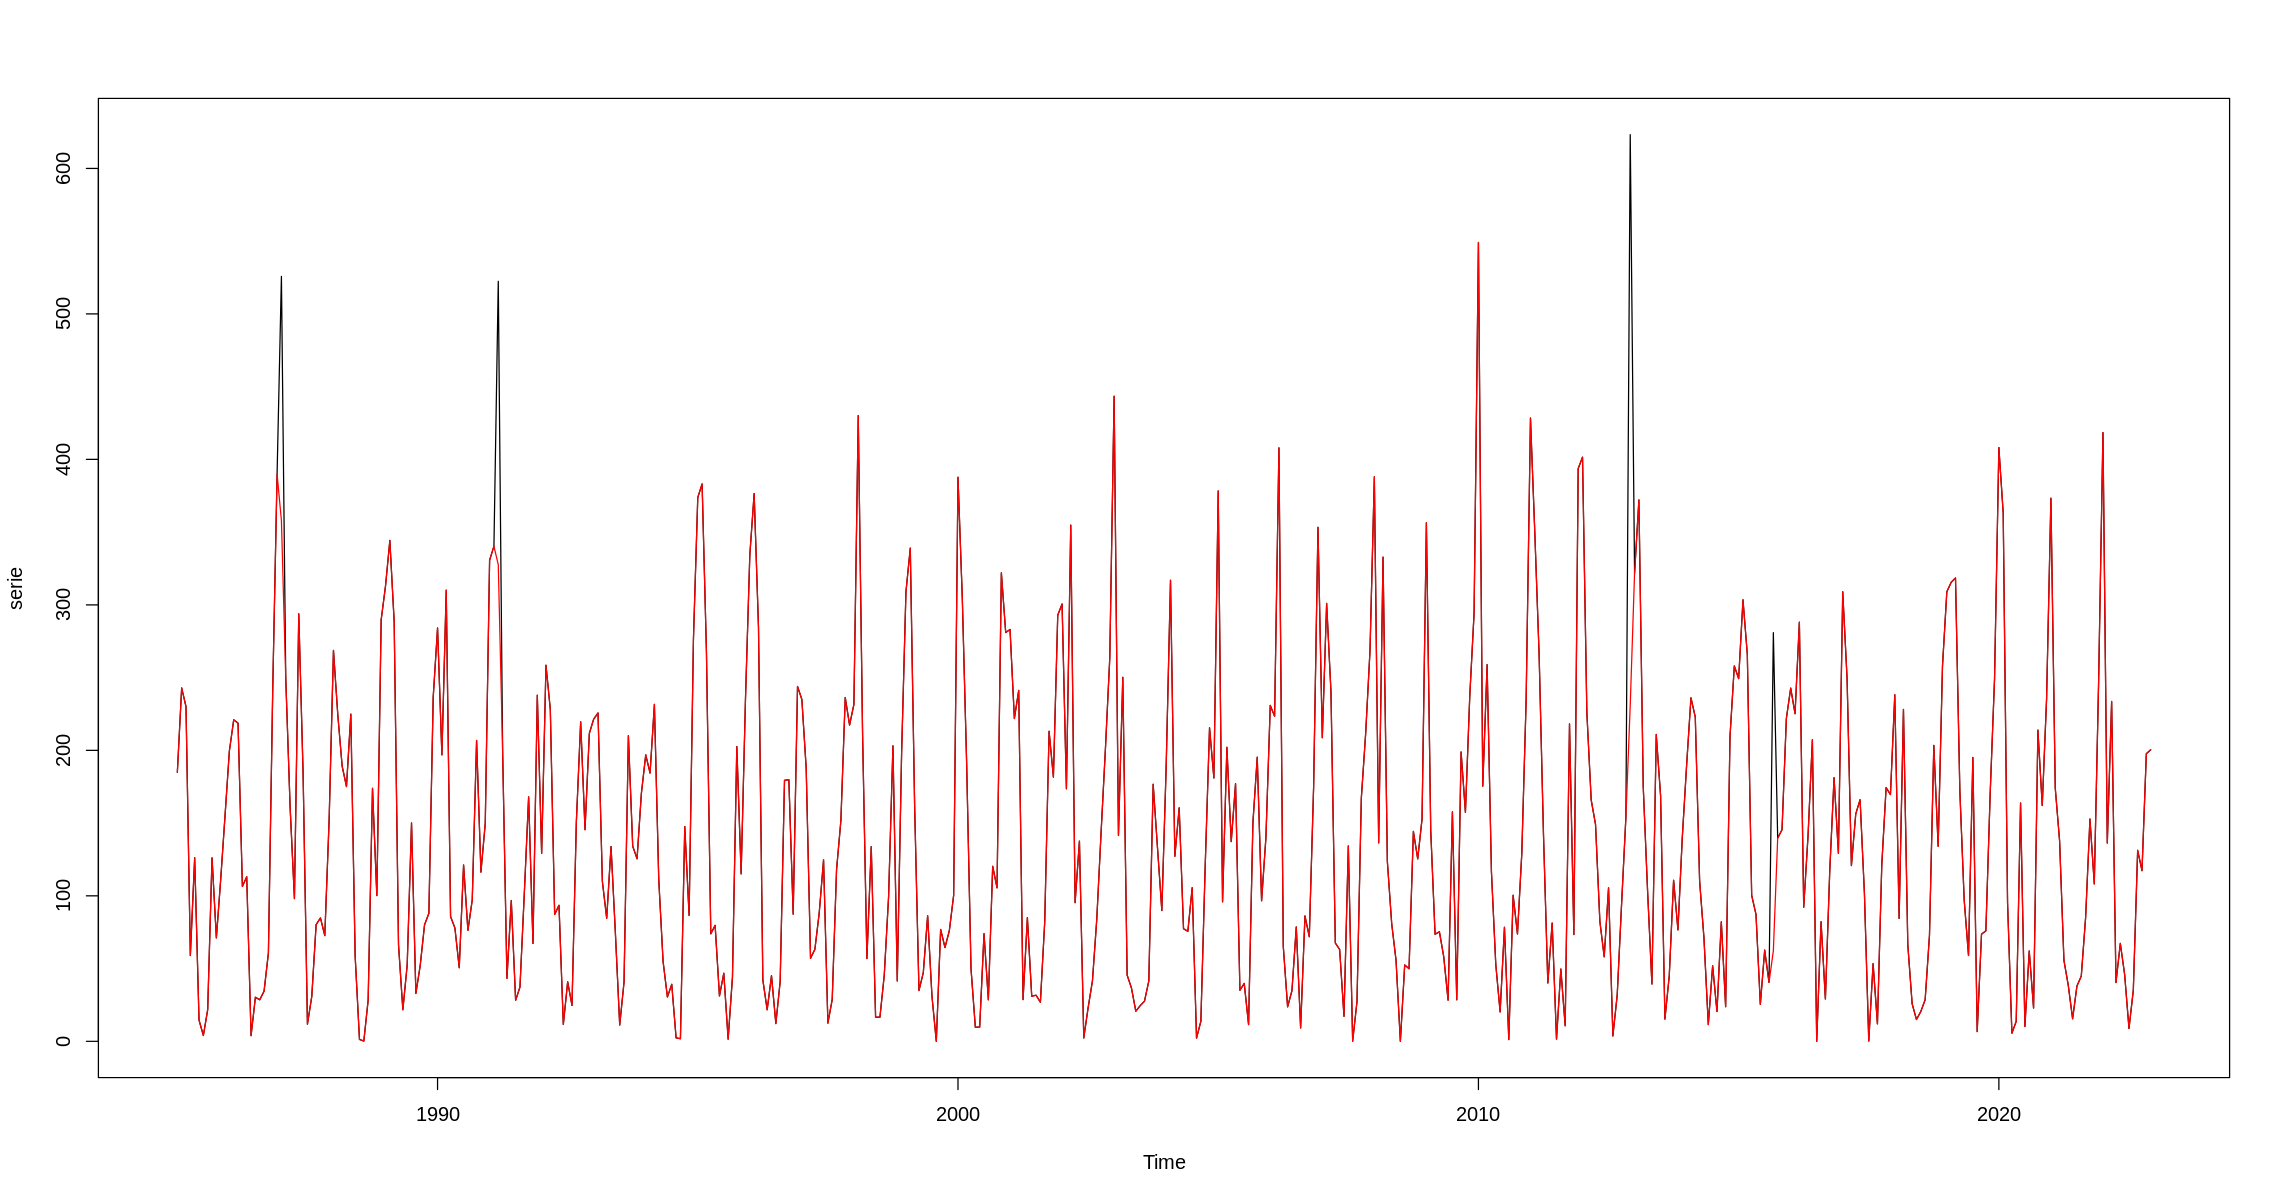

In [ ]:
# Comparação
plot(serie)
lines(serie2, col="red")

#####3.3.4-NORMALIZAÇÃO DA SÉRIE

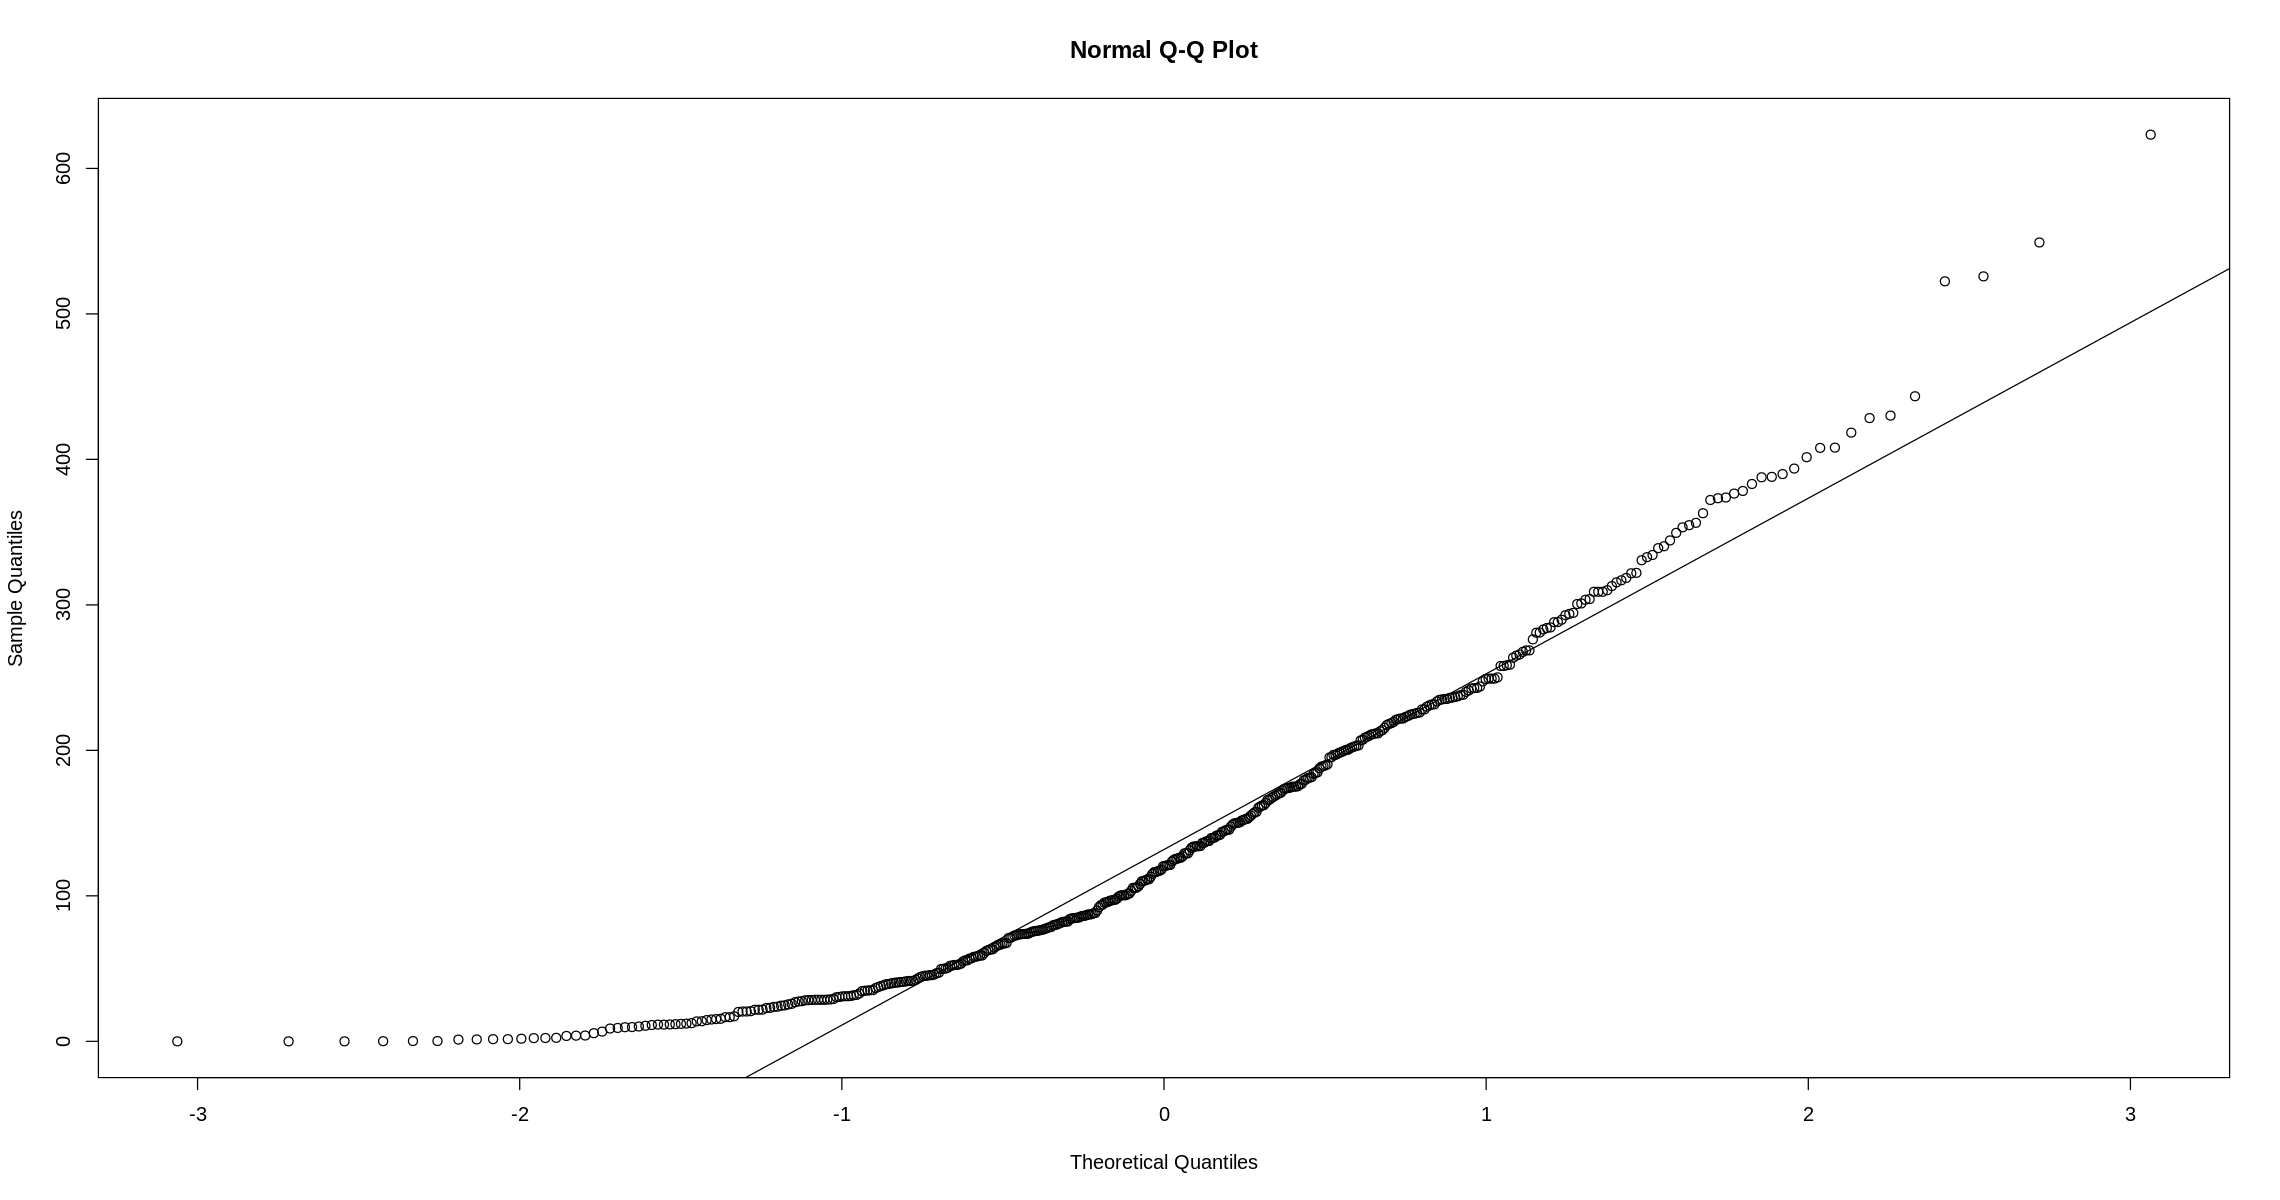

In [ ]:
#TESTE DE NORMALIDADE
qqnorm(serie)
qqline(serie)

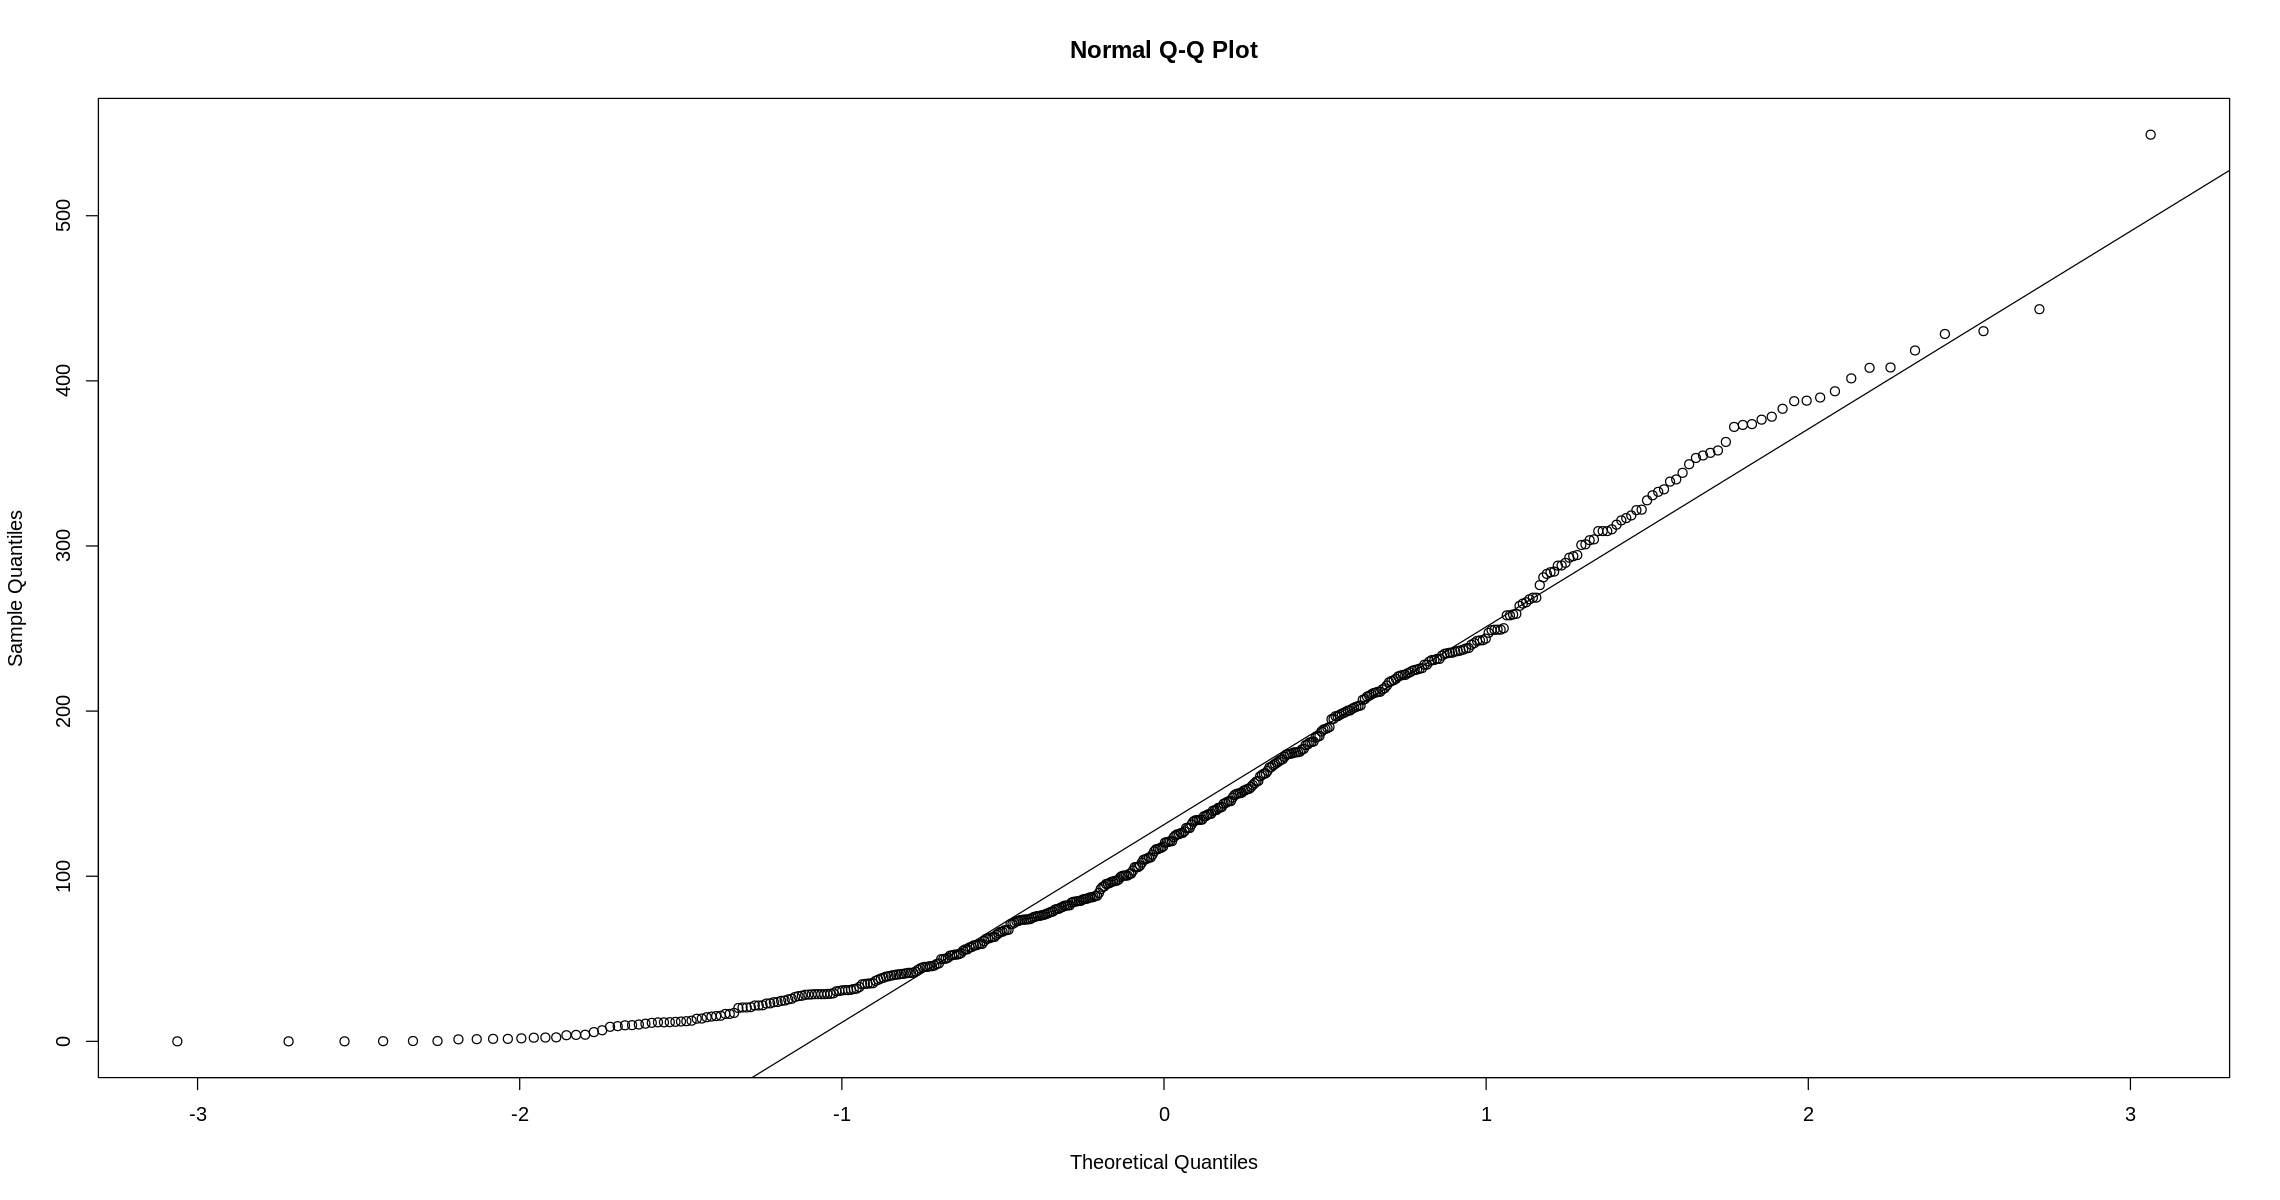

In [ ]:
#TESTE DE NORMALIDADE
qqnorm(serie2)
qqline(serie2)

In [ ]:
#REALIZANDO O TESTE ESTATISTICO
# Ho = distribuição normal : p > 0.05
# Ha = distribuição != normal : p <= 0.05

shapiro.test(serie)



	Shapiro-Wilk normality test

data:  serie
W = 0.92428, p-value = 2.146e-14


In [ ]:
shapiro.test(serie2)



	Shapiro-Wilk normality test

data:  serie2
W = 0.93368, p-value = 2.335e-13


In [ ]:
print(serie)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1985 184.90000 242.90000 230.00000  59.00000 126.20000  14.60000   4.00000
1986 199.60000 221.00000 218.70000 106.50000 113.10000   3.90000  30.30000
1987 525.80000 249.32222 161.30000  98.10000 293.80000 183.90000  11.80000
1988 268.70000 224.40000 189.20000 175.10000 224.90000  58.60000   1.30000
1989 312.90000 344.30000 288.20000  66.30000  21.70000  52.50000 150.10000
1990 284.10000 196.90000 310.10000  85.80000  77.90000  50.60000 121.20000
1991 330.70000 340.30000 522.40000 200.30000  43.30000  96.80000  28.20000
1992 129.20000 258.50000 228.13056  87.20000  93.50000  11.60000  40.90000
1993 221.50000 225.70000 110.00000  84.60000 133.90000  74.70000  11.20000
1994 196.90000 184.40000 231.60000 111.40000  54.90000  30.50000  39.20000
1995 373.80000 383.10000 267.70000  73.90000  79.70000  31.20000  46.80000
1996 334.30000 376.50000 284.50000  42.30000  21.70000  45.10000  12.20000
1997 235.00000 187.60000 

In [ ]:
print(serie2)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1985 184.90000 242.90000 230.00000  59.00000 126.20000  14.60000   4.00000
1986 199.60000 221.00000 218.70000 106.50000 113.10000   3.90000  30.30000
1987 357.83837 249.32222 161.30000  98.10000 293.80000 183.90000  11.80000
1988 268.70000 224.40000 189.20000 175.10000 224.90000  58.60000   1.30000
1989 312.90000 344.30000 288.20000  66.30000  21.70000  52.50000 150.10000
1990 284.10000 196.90000 310.10000  85.80000  77.90000  50.60000 121.20000
1991 330.70000 340.30000 327.63396 200.30000  43.30000  96.80000  28.20000
1992 129.20000 258.50000 228.13056  87.20000  93.50000  11.60000  40.90000
1993 221.50000 225.70000 110.00000  84.60000 133.90000  74.70000  11.20000
1994 196.90000 184.40000 231.60000 111.40000  54.90000  30.50000  39.20000
1995 373.80000 383.10000 267.70000  73.90000  79.70000  31.20000  46.80000
1996 334.30000 376.50000 284.50000  42.30000  21.70000  45.10000  12.20000
1997 235.00000 187.60000 

In [ ]:
#PELO TESTE DE NORMALIDADE AS 2 SÉRIES NÃO SÃO NORMAIS

######3.3.4.2-TRANSFORMAÇÃO DA SÉRIE PARA NORMALIDADE

In [ ]:
#usando a série 2
print(serie2)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1985 184.90000 242.90000 230.00000  59.00000 126.20000  14.60000   4.00000
1986 199.60000 221.00000 218.70000 106.50000 113.10000   3.90000  30.30000
1987 357.83837 249.32222 161.30000  98.10000 293.80000 183.90000  11.80000
1988 268.70000 224.40000 189.20000 175.10000 224.90000  58.60000   1.30000
1989 312.90000 344.30000 288.20000  66.30000  21.70000  52.50000 150.10000
1990 284.10000 196.90000 310.10000  85.80000  77.90000  50.60000 121.20000
1991 330.70000 340.30000 327.63396 200.30000  43.30000  96.80000  28.20000
1992 129.20000 258.50000 228.13056  87.20000  93.50000  11.60000  40.90000
1993 221.50000 225.70000 110.00000  84.60000 133.90000  74.70000  11.20000
1994 196.90000 184.40000 231.60000 111.40000  54.90000  30.50000  39.20000
1995 373.80000 383.10000 267.70000  73.90000  79.70000  31.20000  46.80000
1996 334.30000 376.50000 284.50000  42.30000  21.70000  45.10000  12.20000
1997 235.00000 187.60000 

In [ ]:
#verificando a existência de valores nulos
serie2 %>%
  as.numeric() %>%                   # converte a série para vetor numérico
  as_tibble() %>%
  rename(valor = value) %>%
  count(valor == 0)

valor == 0,n
<lgl>,<int>
FALSE,453
TRUE,3


In [ ]:
#COMO EXISTEM VALORES NULOS USAR TRANSFORMAÇÕES NÃO LOGARITMICAS

In [ ]:
serie3<-
  sign(serie2)*abs(serie2)^(1/3)
print(serie3)

           Jan       Feb       Mar       Apr       May       Jun       Jul
1985 5.6969924 6.2393954 6.1269257 3.8929964 5.0159491 2.4440924 1.5874011
1986 5.8441342 6.0459436 6.0248966 4.7400531 4.8360138 1.5740609 3.1175556
1987 7.0995197 6.2939071 5.4434987 4.6120039 6.6478916 5.6867034 2.2766381
1988 6.4529142 6.0767908 5.7408171 5.5945099 6.0813008 3.8841787 1.0913929
1989 6.7889382 7.0088324 6.6053828 4.0473539 2.7892445 3.7444362 5.3144733
1990 6.5739099 5.8176632 6.7686271 4.4105806 4.2708320 3.6987091 4.9488111
1991 6.9153059 6.9815842 6.8938681 5.8509580 3.5115266 4.5915408 3.0438018
1992 5.0553843 6.3702066 6.1102806 4.4344405 4.5387598 2.2637024 3.4454115
1993 6.0504997 6.0885029 4.7914199 4.3899218 5.1159567 4.2115329 2.2373779
1994 5.8176632 5.6918525 6.1411002 4.8116615 3.8006462 3.1243999 3.3969985
1995 7.2035476 7.2627994 6.4448991 4.1964445 4.3034765 3.1481218 3.6036999
1996 6.9403088 7.2208501 6.5769937 3.4842833 2.7892445 3.5595261 2.3020775
1997 6.1710058 5.7245886 

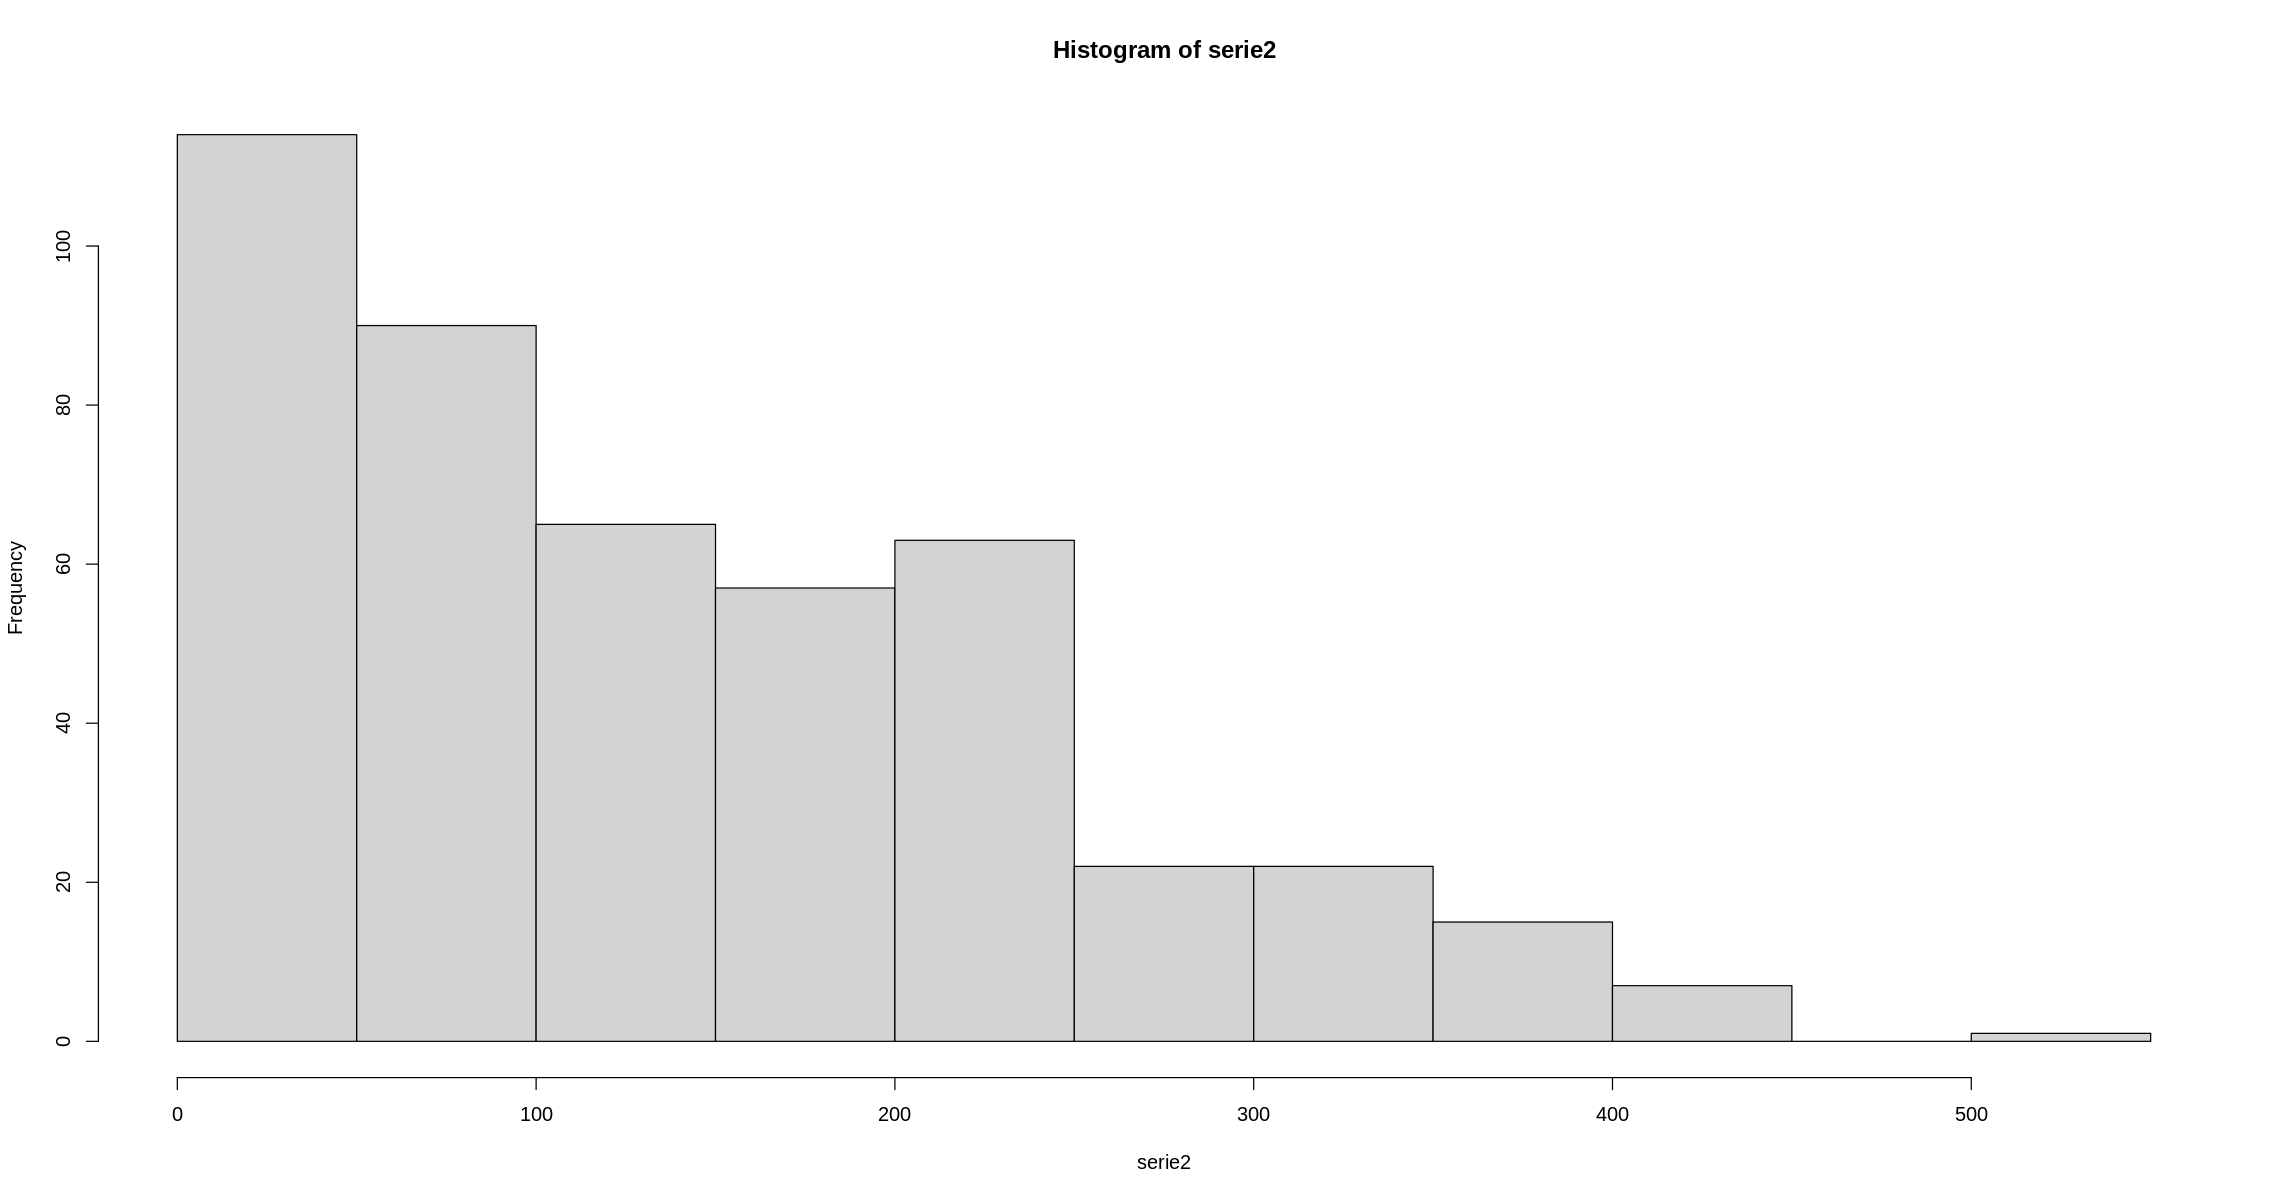

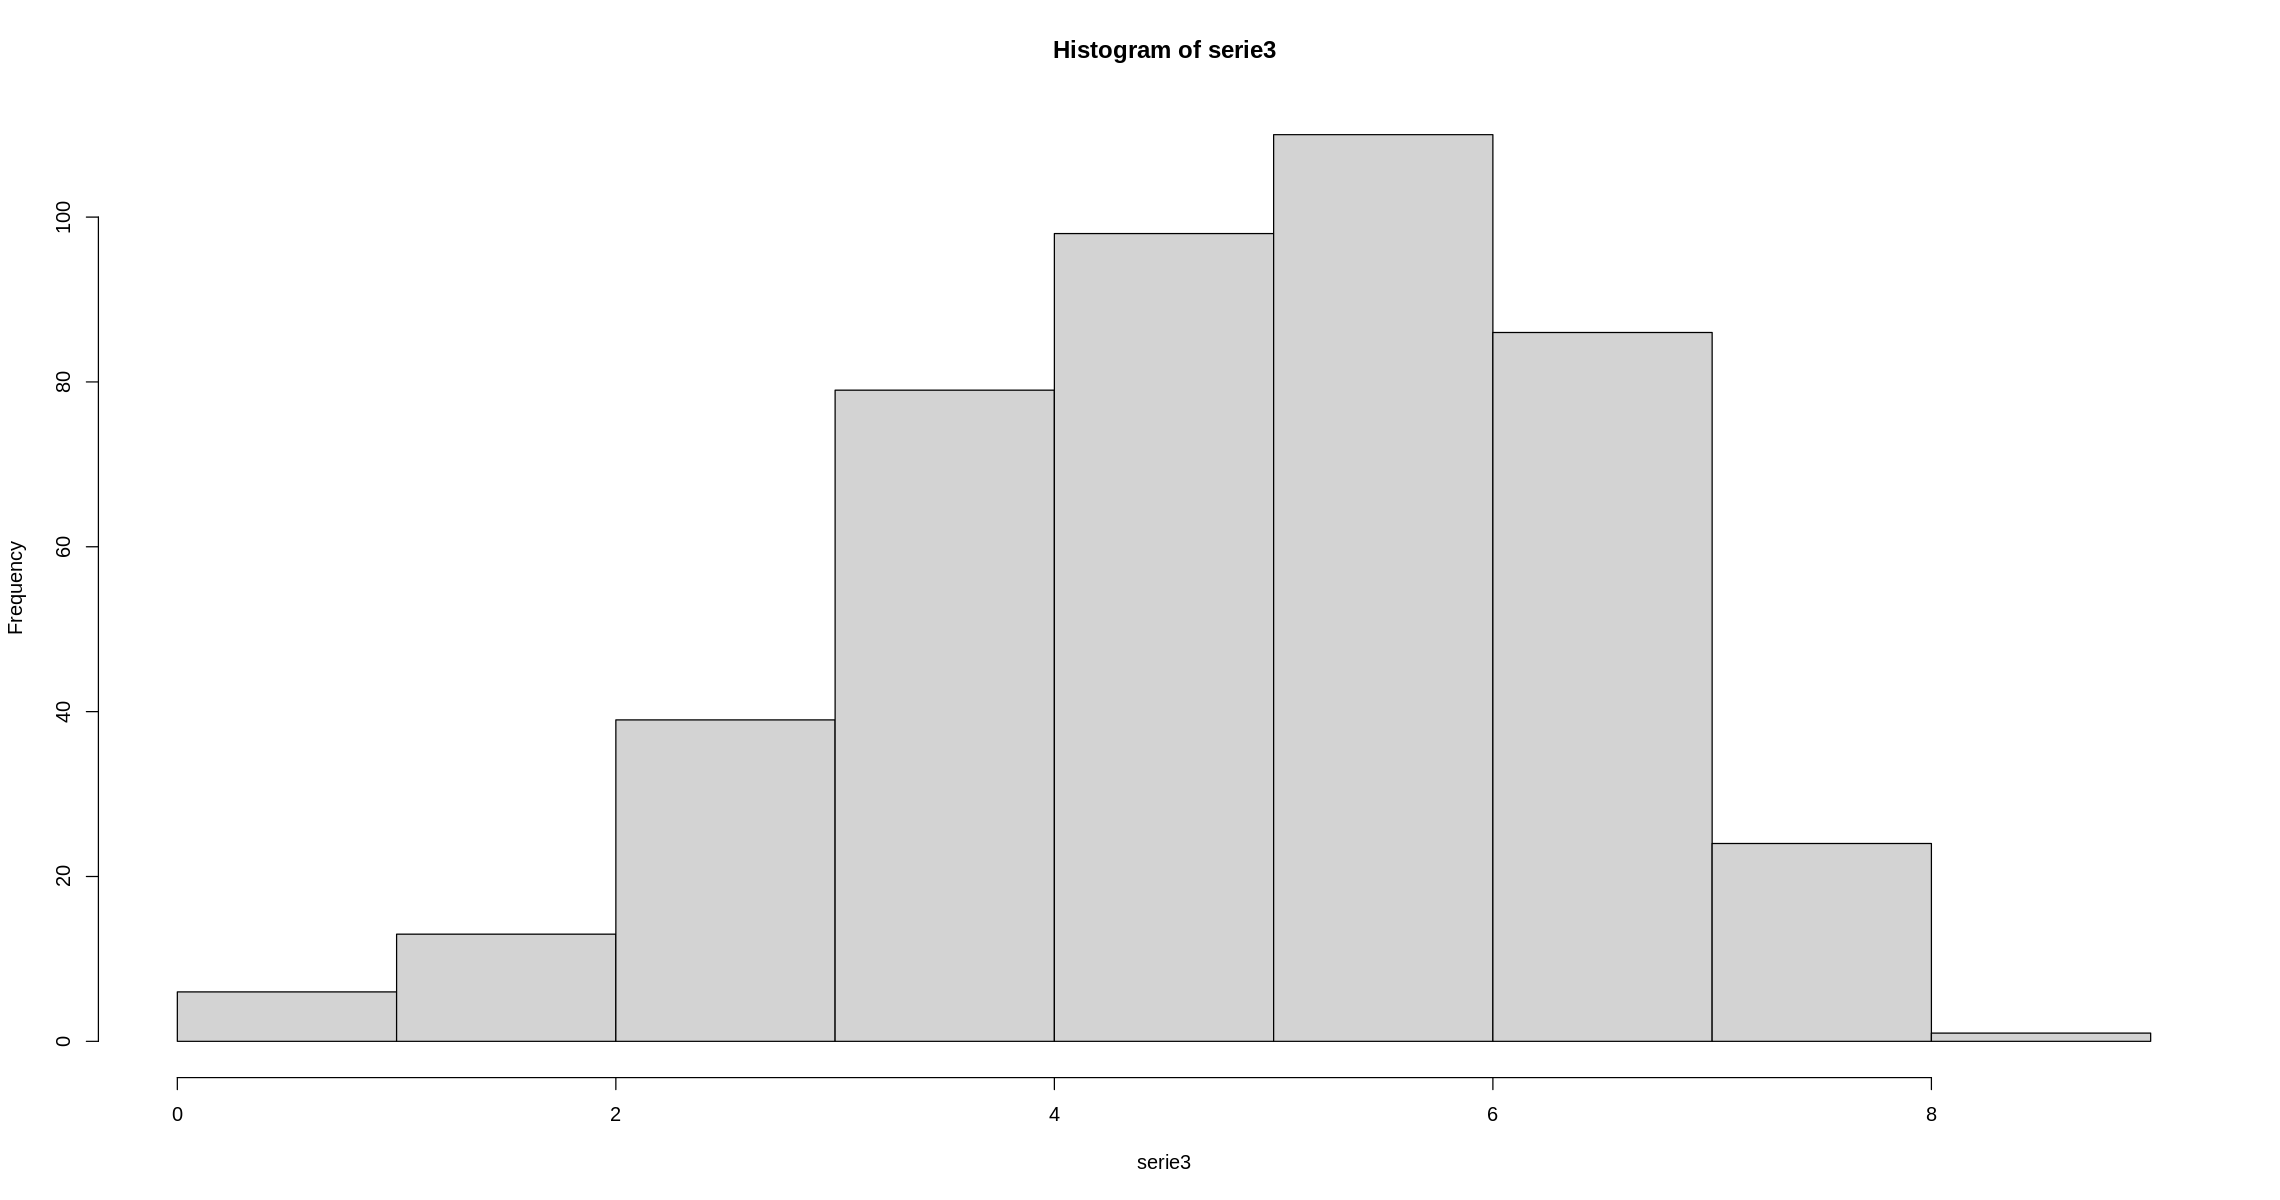

In [ ]:
hist(serie2)
hist(serie3)

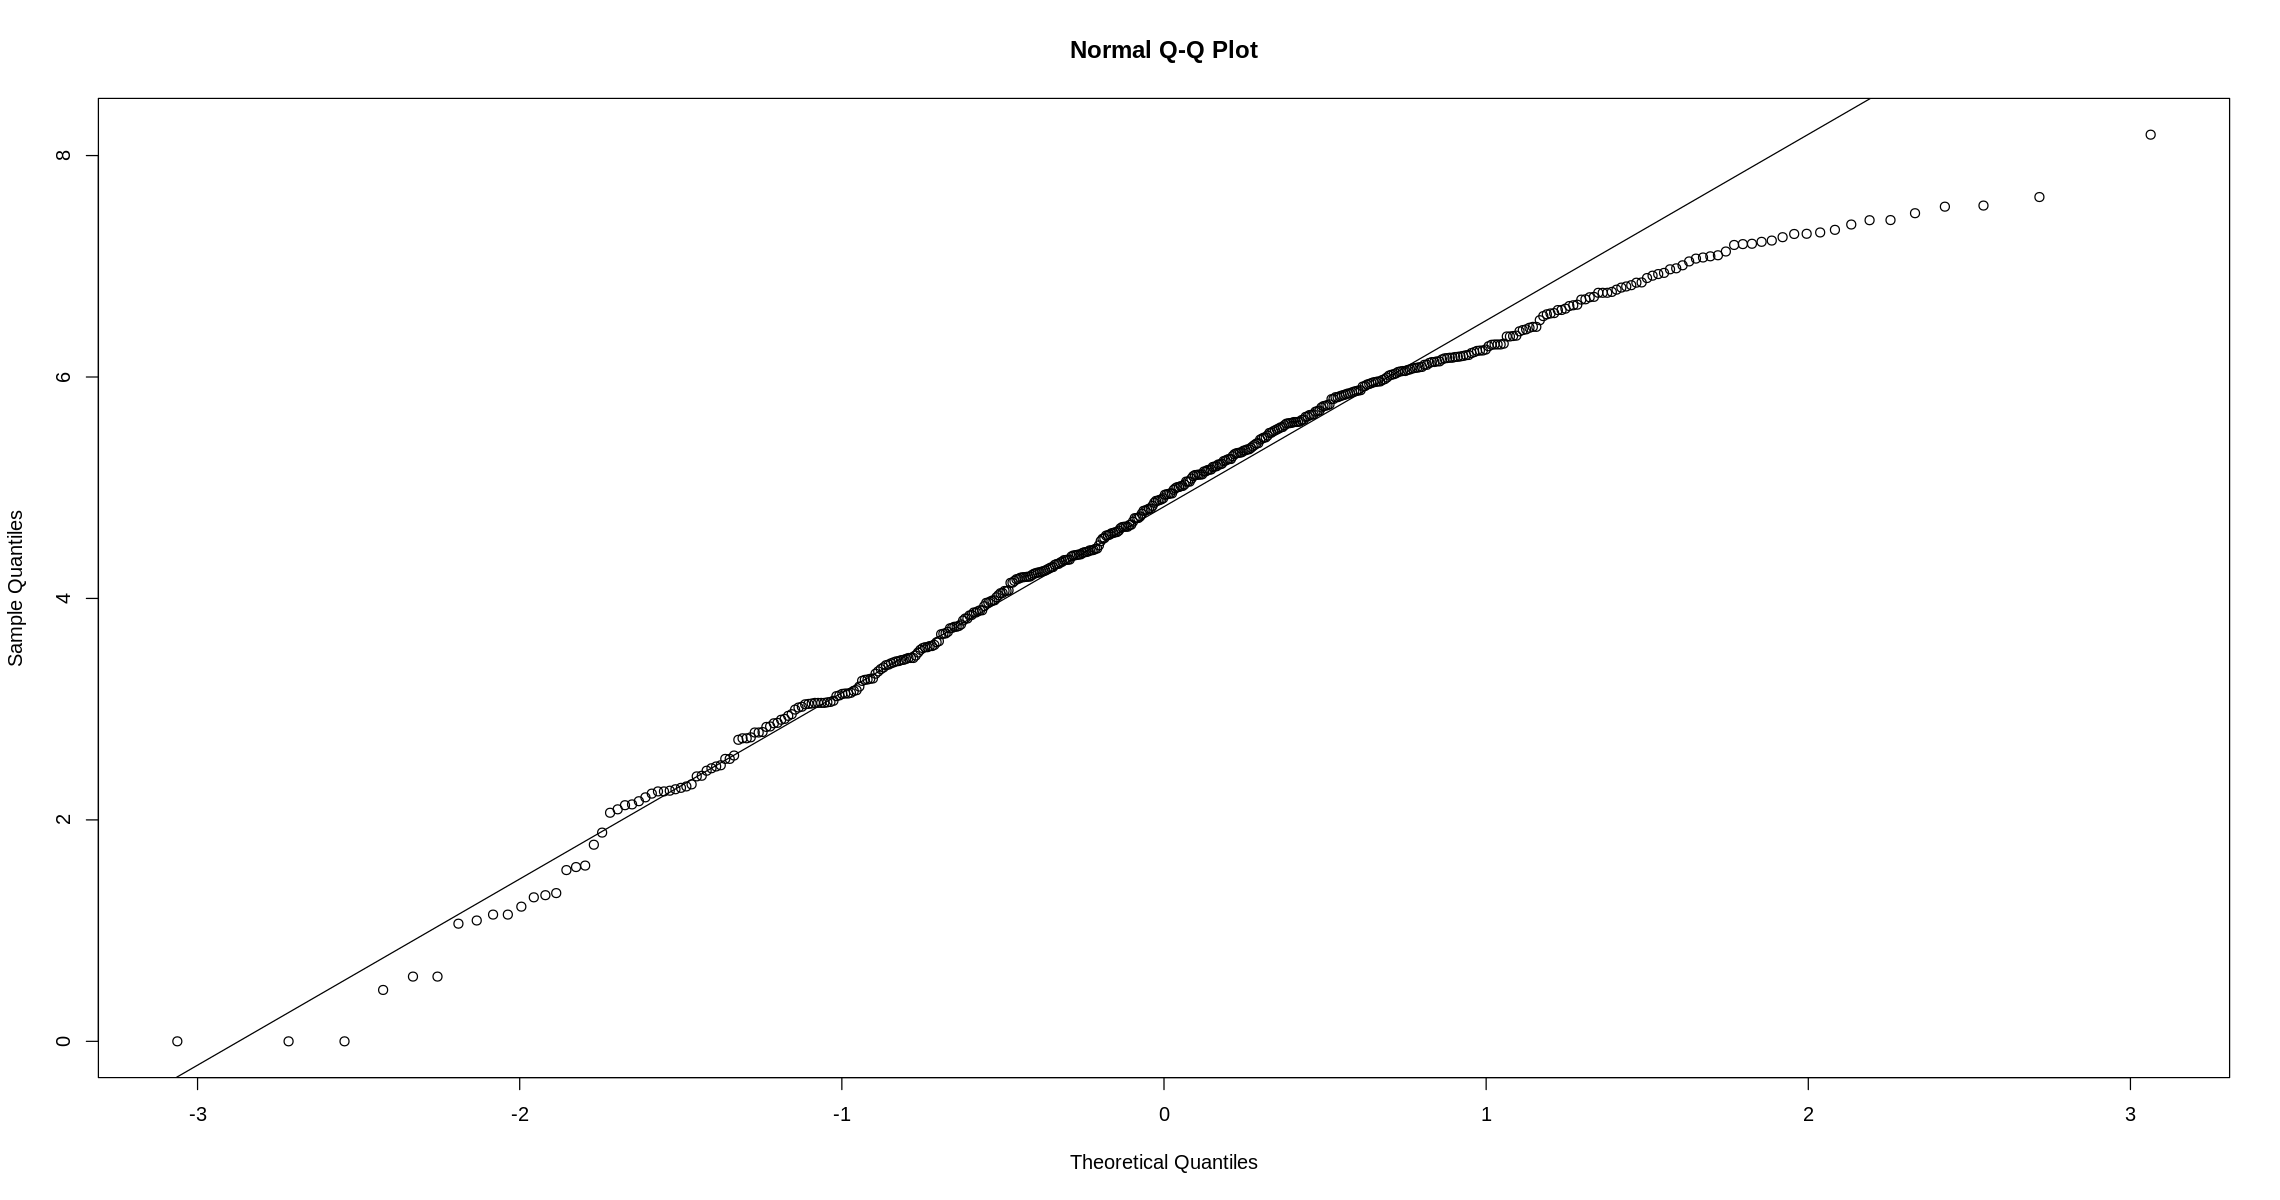

In [ ]:
#VERIFICAÇÃO DA NORMALIDADE
qqnorm(serie3)
qqline(serie3)

In [ ]:
#REALIZANDO O TESTE ESTATISTICO
# Ho = distribuição normal : p > 0.05
# Ha = distribuição != normal : p <= 0.05

shapiro.test(serie3)


	Shapiro-Wilk normality test

data:  serie3
W = 0.97948, p-value = 4.805e-06


In [ ]:
#AINDA NÃO É NORMAL, APESAR DA MELHORA
#ISSO NÃO IMPEDE DE USAR A SÉRIE, CONTUDO, PODE OCORRER PERDA DE QUALIDADE DO MODELO

#####3.3.5-ESTACIONARIDADE DA SÉRIE

In [ ]:
# Teste pp (Philips-Perron)
# Ho = é estacionária: p > 0.05
# Ha = não é estacionária: p <= 0.05

estacionaridade<-
  ur.pp(serie3)
summary(estacionaridade)


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3389 -0.7735  0.1516  1.0145  2.8574 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.37463    0.20345   11.67   <2e-16 ***
y.l1         0.50087    0.04067   12.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.342 on 453 degrees of freedom
Multiple R-squared:  0.2508,	Adjusted R-squared:  0.2491 
F-statistic: 151.6 on 1 and 453 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-alpha  is: -220.8552 

         aux. Z statistics
Z-tau-mu           11.5638


In [ ]:
#a série não é estacionária pois p-value: < 2.2e-16

In [ ]:
#verificando as possíveis diferenciações
ndiffs(serie3)

[1] 0

In [ ]:
#não adianta realizar a diferenciação, mas iremos fazer

In [ ]:
serie4<-
  diff(serie3)

In [ ]:
estacionaridade = ur.pp(serie4)
summary(estacionaridade)


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7156 -0.9764  0.1544  1.0014  4.0342 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0007728  0.0697613  -0.011    0.991    
y.l1        -0.2849910  0.0450788  -6.322  6.2e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.486 on 452 degrees of freedom
Multiple R-squared:  0.08124,	Adjusted R-squared:  0.07921 
F-statistic: 39.97 on 1 and 452 DF,  p-value: 6.202e-10


Value of test-statistic, type: Z-alpha  is: -552.9116 

         aux. Z statistics
Z-tau-mu           -0.0111


In [ ]:
#ainda não é estacionária

In [ ]:
#fazendo outra diferenciação
serie5 <- diff(serie4)
estacionaridade <- ur.pp(serie5)
summary(estacionaridade)


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6171 -1.3177  0.0617  1.1178  6.1789 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0008645  0.0887192    0.01    0.992    
y.l1        -0.6514732  0.0357288  -18.23   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.888 on 451 degrees of freedom
Multiple R-squared:  0.4244,	Adjusted R-squared:  0.4231 
F-statistic: 332.5 on 1 and 451 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-alpha  is: -662.2439 

         aux. Z statistics
Z-tau-mu            0.0156


In [ ]:
#ainda não é estacionária

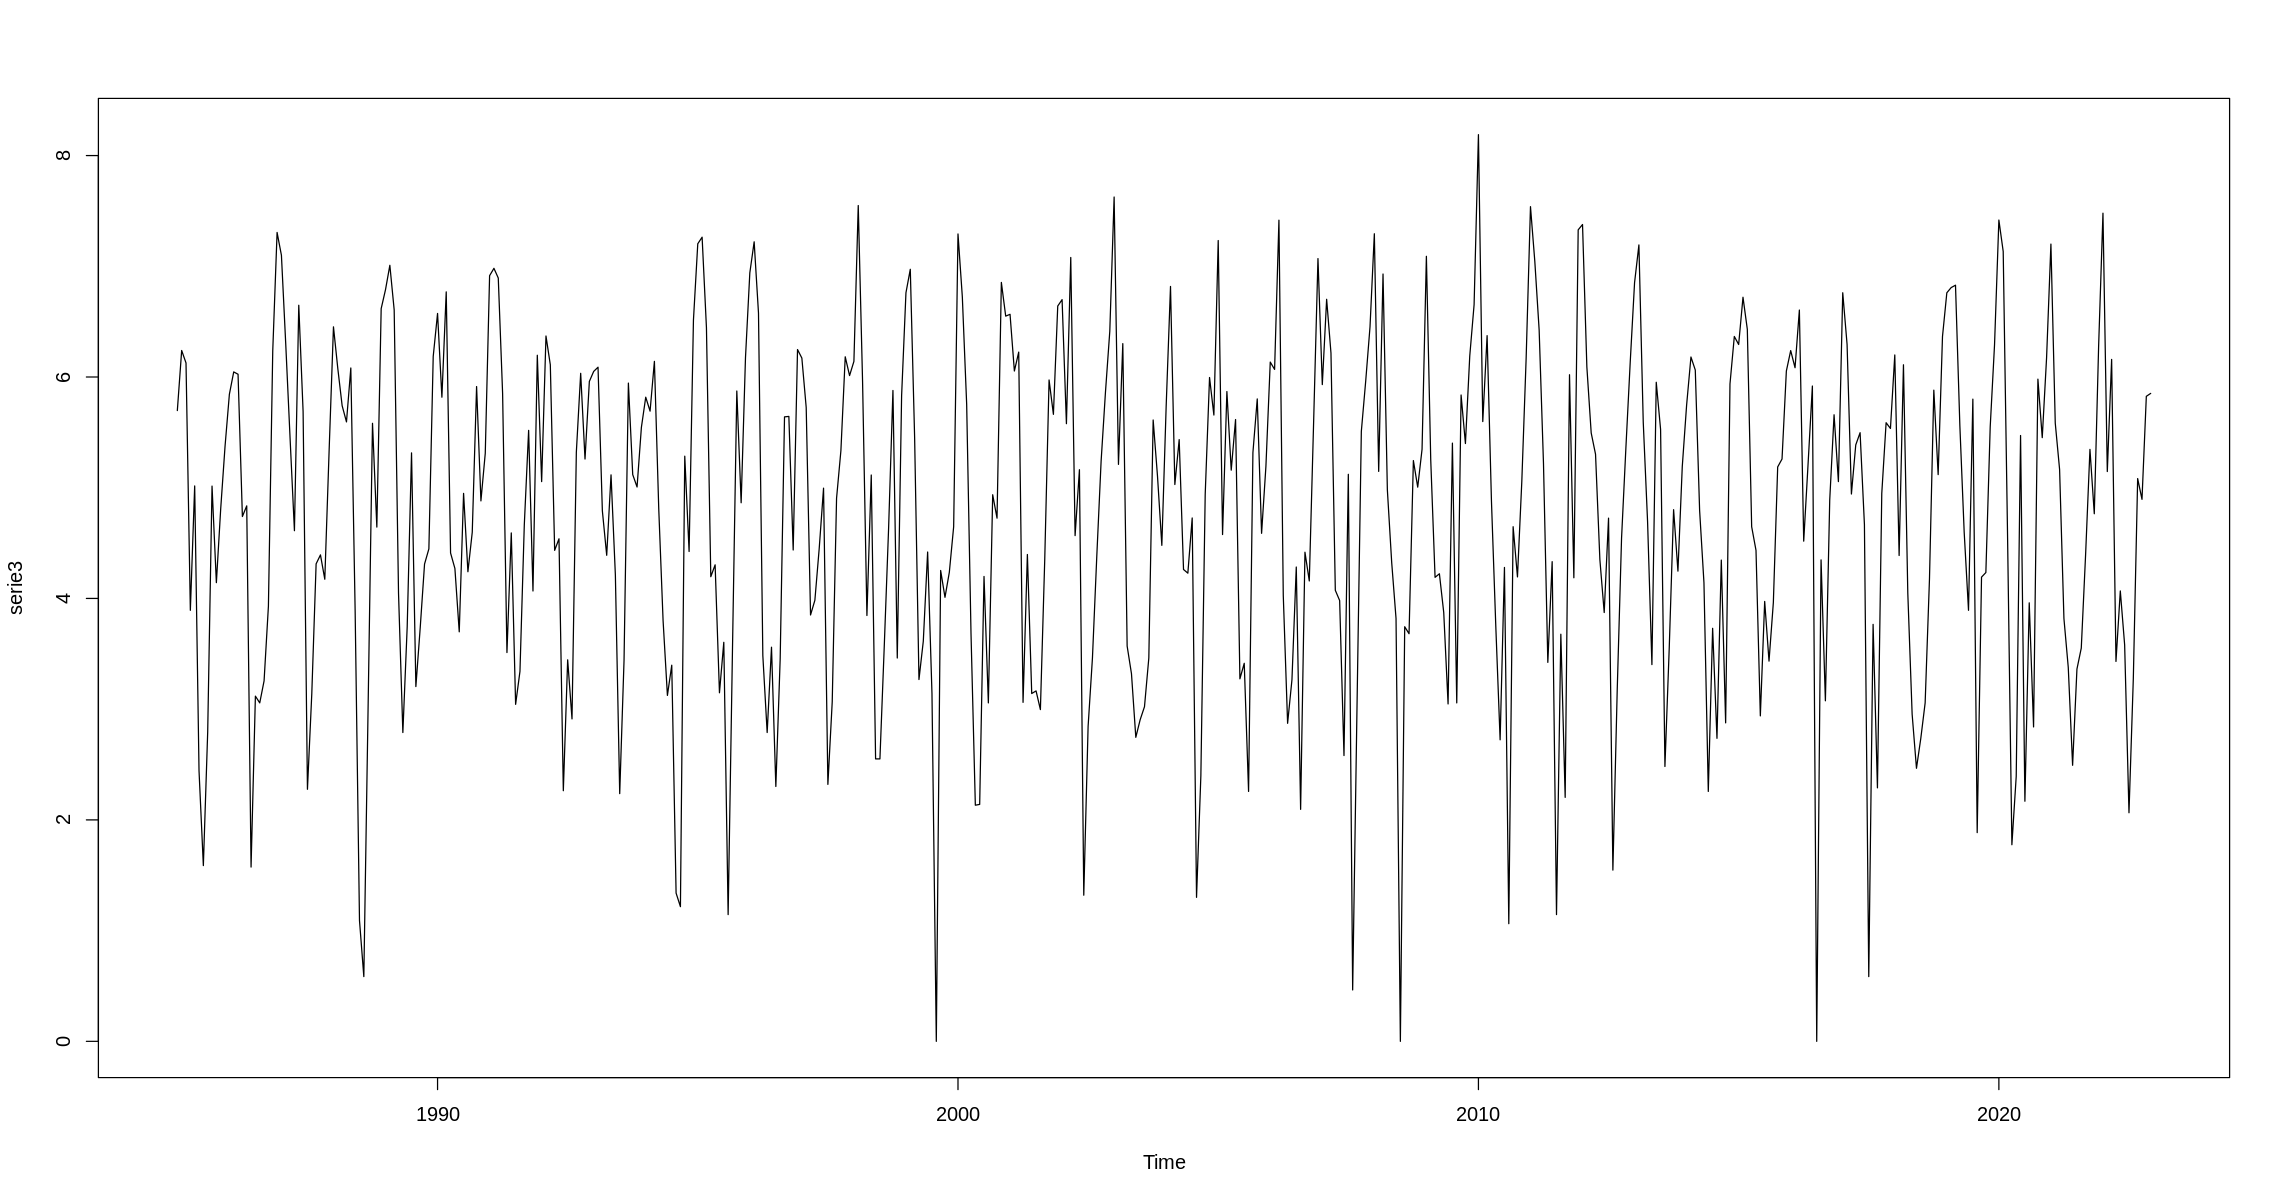

In [ ]:
plot(serie3)

#####3.3.5.2-REALIZANDO OUTROS TESTES DE ESTACIONARIDADE

In [ ]:
#REALIZANDO OUTROS TESTES DE ESTACIONARIDADE

In [ ]:
# Teste KPSS (Kwiatkowski-Phillips-Schmidt-Shin)

# Ha = não é estacionária: teste estatístico > valor crítico
# Ho = é estacionária:  teste estatístico < valor crítico

In [ ]:
kpss <- ur.kpss(serie3)
summary(kpss)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.0086 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [ ]:
#COMO O TESTE ESTATÍSTICO É MENOR QUE O VALOR CRÍTICO, A SÉRIE É ESTACIONÁRIA

In [ ]:
# Teste df (Dickey Fuller)

# Ha = não é estacionária: teste estatístico > valor crítico
# Ho = é estacionária:  teste estatístico < valor crítico
df <- ur.df(serie3)
summary(df)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5202 -0.8099  0.3166  1.1498  4.0785 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.03526    0.01402  -2.514   0.0123 *  
z.diff.lag -0.26734    0.04531  -5.900 7.15e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.476 on 452 degrees of freedom
Multiple R-squared:  0.09392,	Adjusted R-squared:  0.08991 
F-statistic: 23.43 on 2 and 452 DF,  p-value: 2.089e-10


Value of test-statistic is: -2.5145 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [ ]:
# COMO O VALOR DO TESTE É -2.5145 MENOR QUE E MENOR QUE O VALOR CRÍTICO, A SÉRIE É ESTACIONÁRIA

#####3.3.6-AUTOCORRELAÇÃO DA SÉRIE

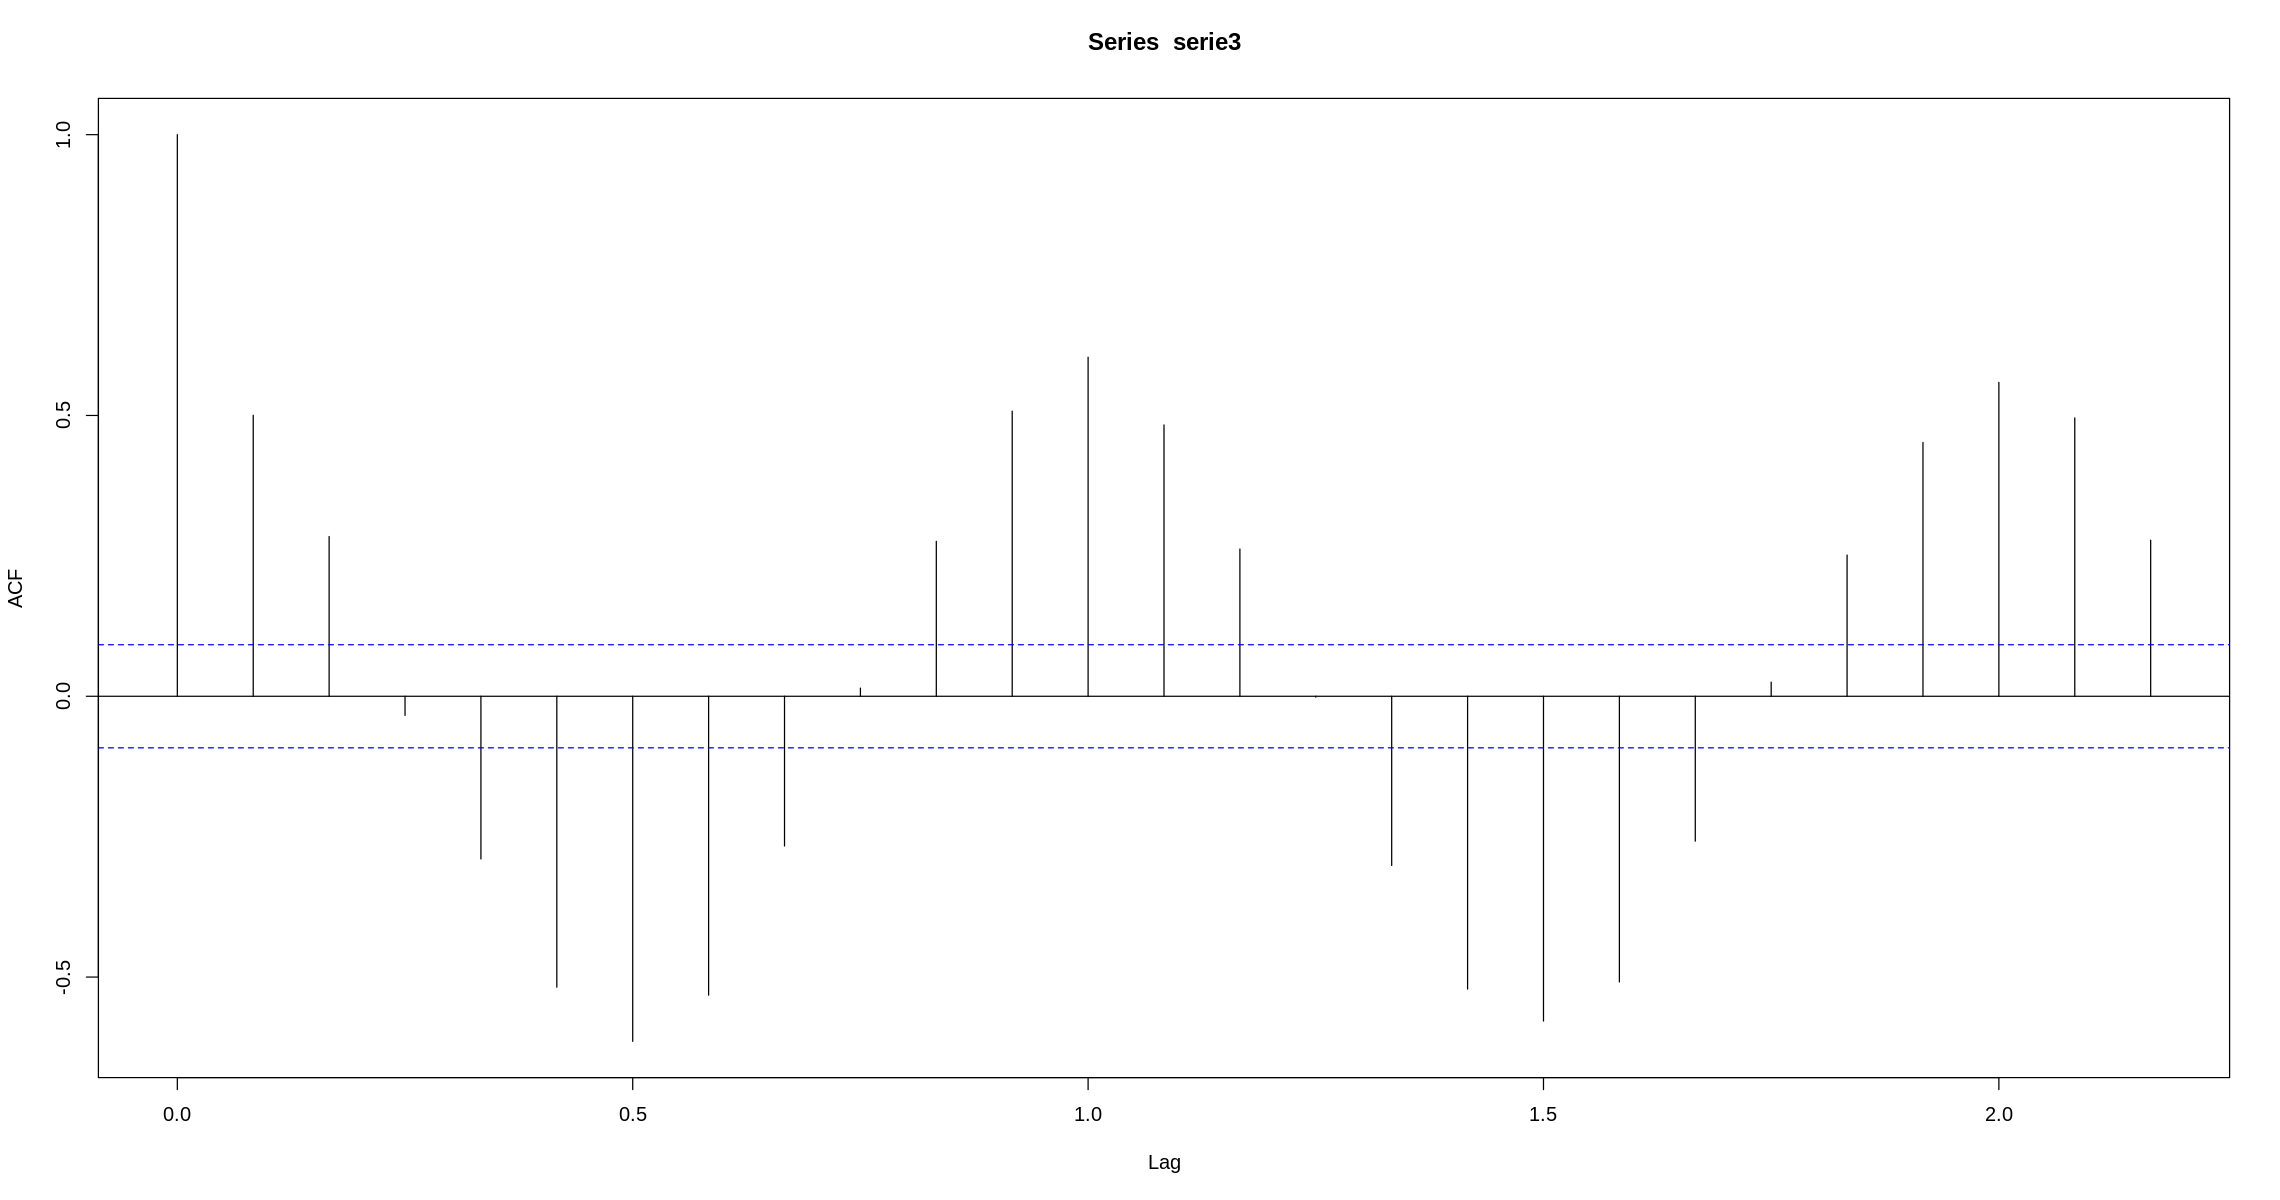

In [ ]:
#VERIFICANDO A AUTO CORRELAÇÃO DA SÉRIE
acf(serie3)


In [ ]:
# COMO EXISTEM LAGS FORA DOS LIMITES, VERIFICA-SE QUE EXISTE AUTOCORRELAÇÃO ENTRE OS DADOS

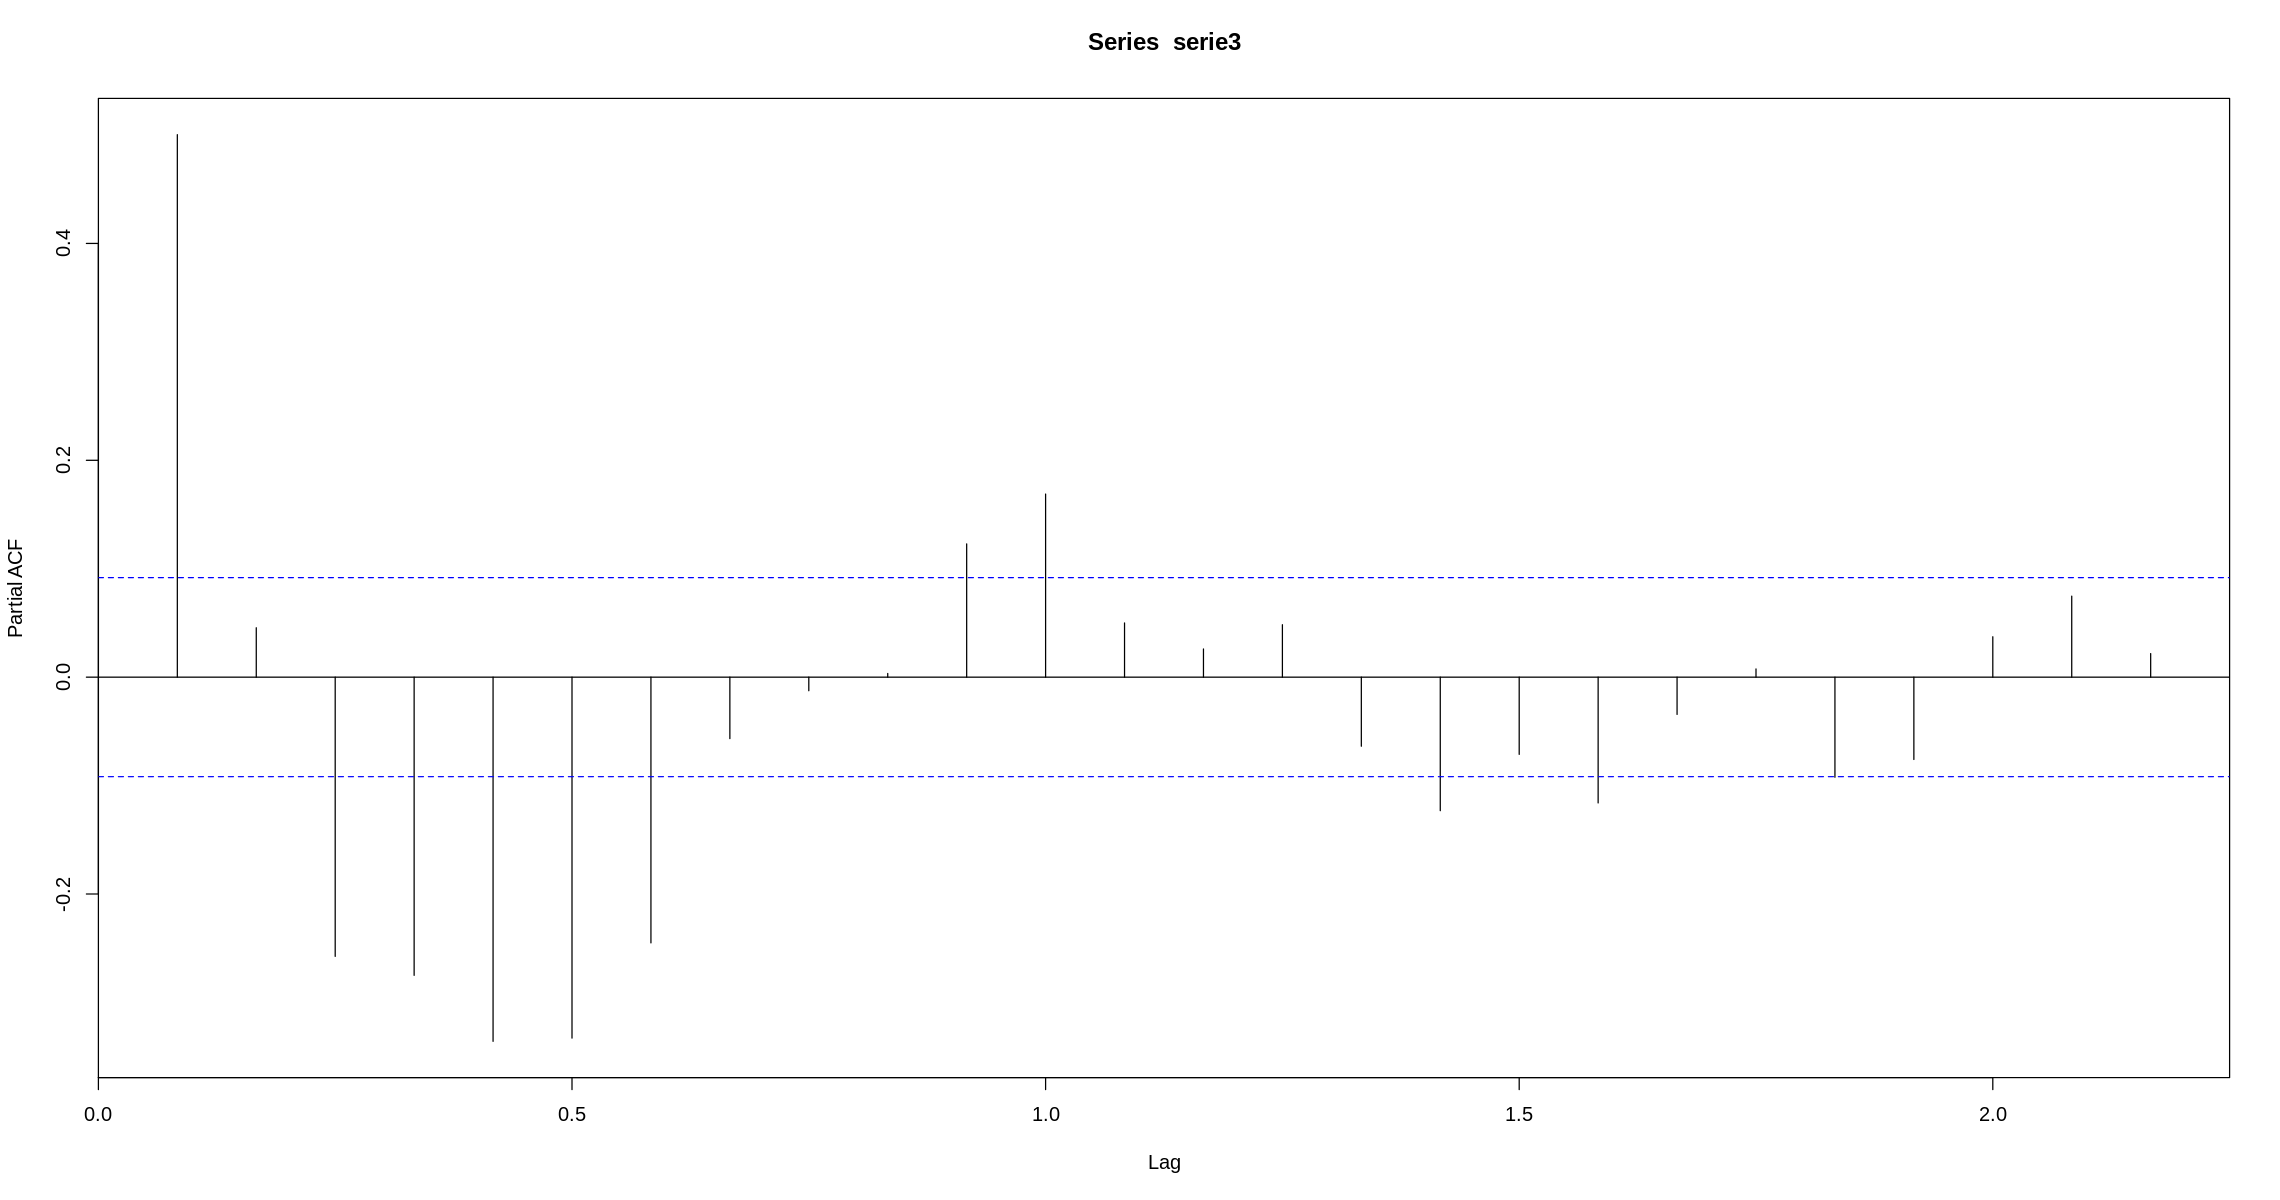

In [ ]:
pacf(serie3)


In [ ]:
#EXISTEM UITOS LAGS FORA DOS LIMITES, MOSTRANDO AUTOCORRELAÇÃO ENTRE OS DADOS

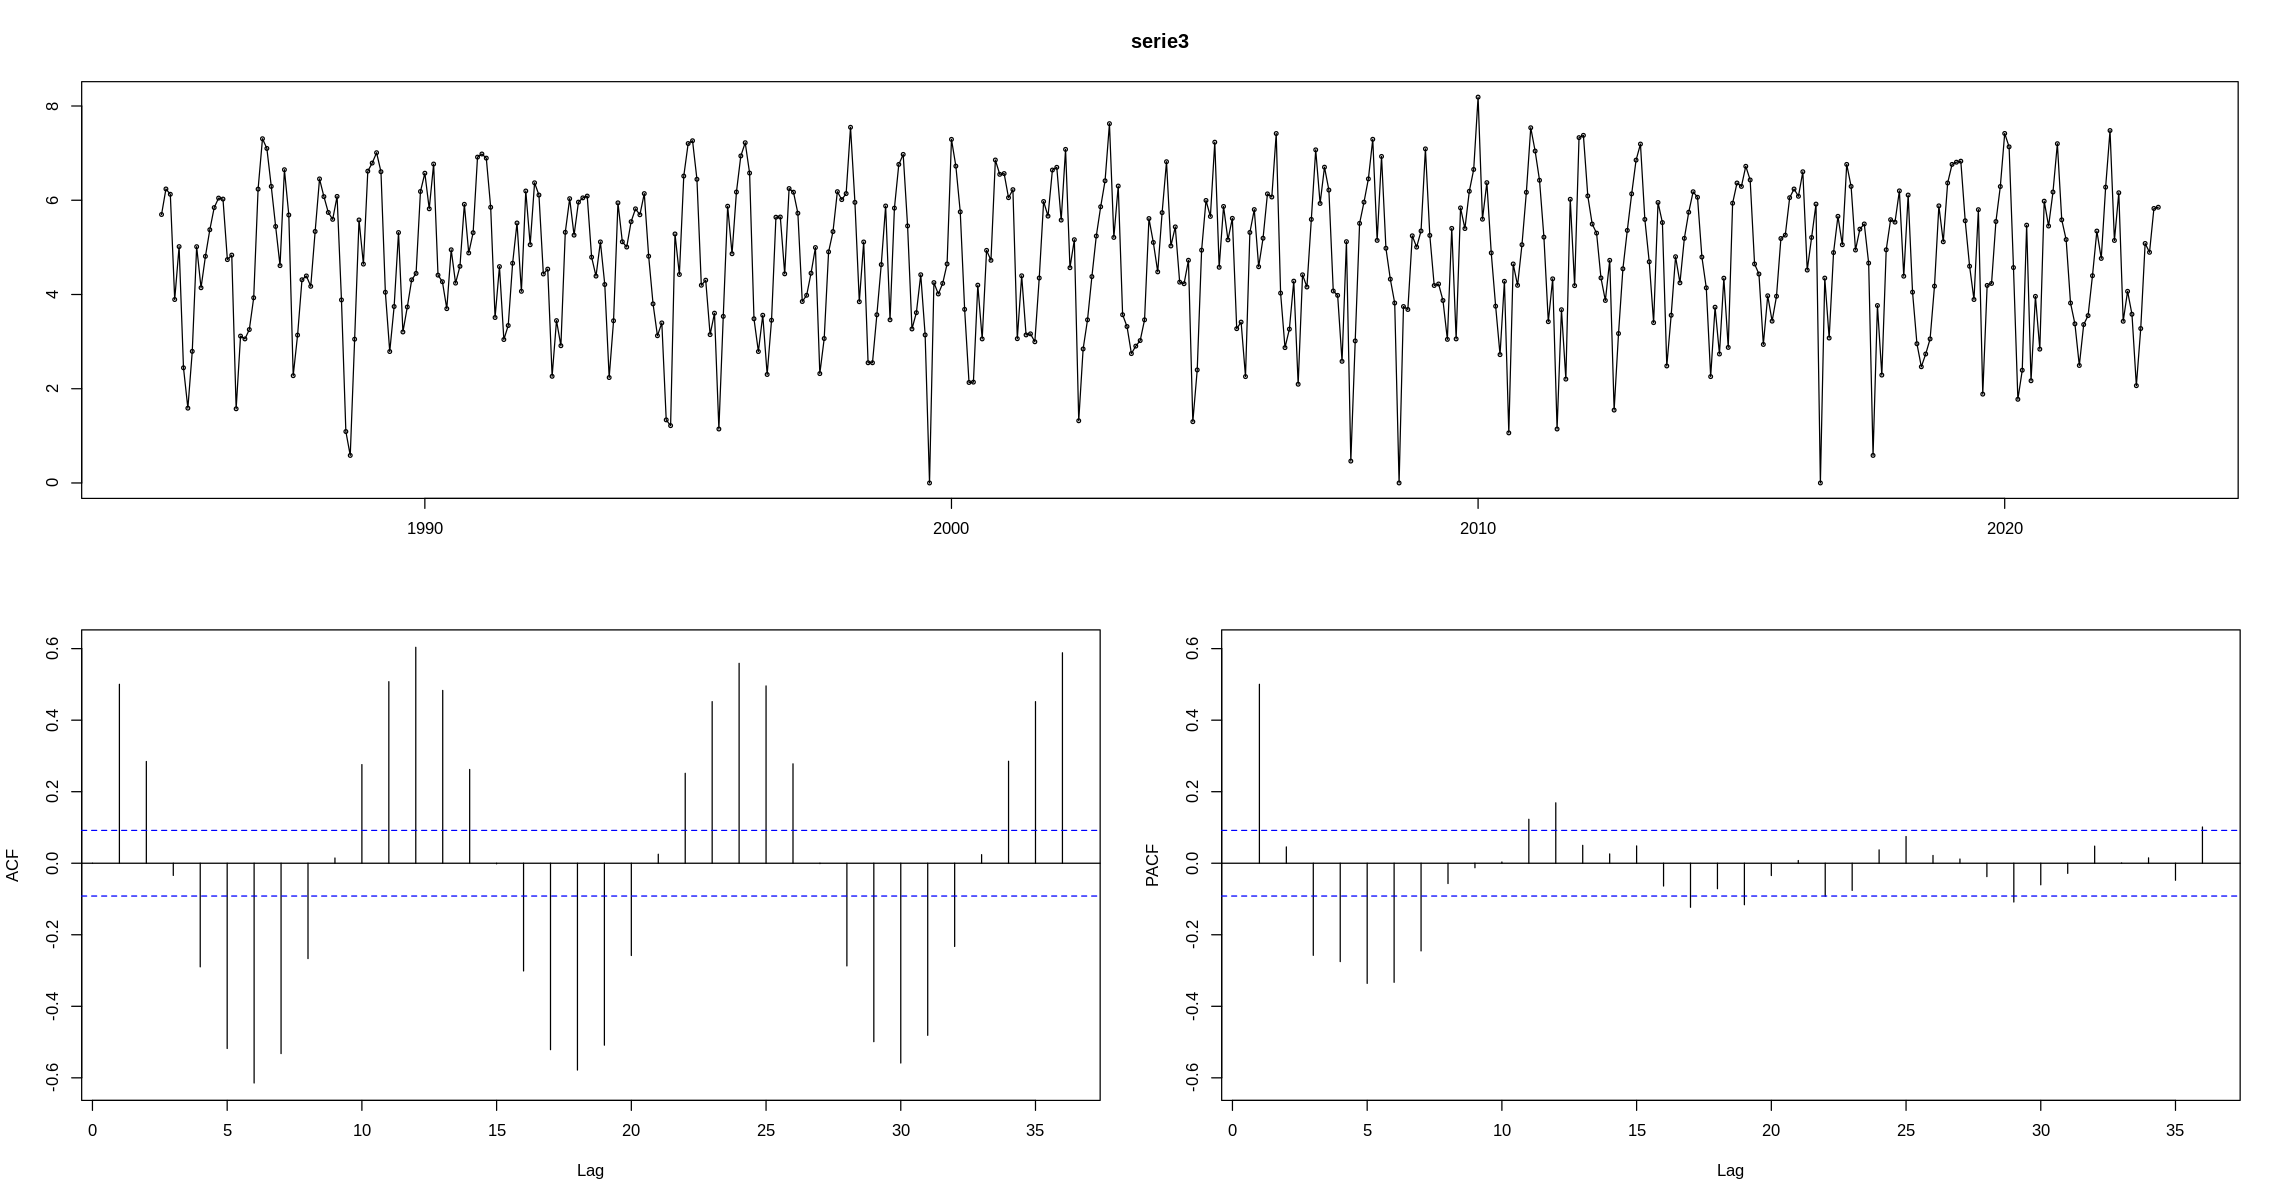

In [ ]:
#RODANDO O DISPLAY COM OS GRÁFICOS
tsdisplay(serie3)

In [ ]:
#REALIZANDO O TESTE ESTATÍSTICO


In [ ]:
# Teste de Autocorrelação (Ljung-Box)
# Ho = não é autocorrelacionado: p > 0.05
# Ha = é autocorrelacionado: p <= 0.05
Box.test(serie3, type = "Ljung-Box")


	Box-Ljung test

data:  serie3
X-squared = 114.9, df = 1, p-value < 2.2e-16


In [ ]:
#COMO O P-VALUE É MENOR QUE 0,05, EXISTE AUTOCORRELAÇÃO ENTRE OS DADOS

#####3.4-CONCLUSÃO DA PREPARAÇÃO PARA A SÉRIE TEMPORAL

In [ ]:
cat("CONCLUI-SE QUE APÓS A TRANSFORMAÇÃO DOS DADOS PARA A SÉRIE TEMPORAL.\n
A SÉRIE 3 PARECEU MAIS PROMISSORA PARA SER UTILIZADA NOS MODELOS.\nAPESAR DE NÃO PASSAR NOS TESTES DE NORMALIDADE, ELA PASSOU NOS TESTES DE ESTACIONARIDADE,
PRINCIPALMENTE USANDO O TESTE KPSS (Kwiatkowski-Phillips-Schmidt-Shin).\n
A SÉRIE 3 TAMBÉM POSSUI AUTOCORRELAÇÃO ENTRE SEUS DADOS.\nAPÓS SEREM REALIZADAS AS ANÁLISES GRÁFICAS DE ACF, PACF E O TESTE DE AUTOCORRELAÇÃO DE LJUNG-BOX.\n")

CONCLUI-SE QUE APÓS A TRANSFORMAÇÃO DOS DADOS PARA A SÉRIE TEMPORAL.

A SÉRIE 3 PARECEU MAIS PROMISSORA PARA SER UTILIZADA NOS MODELOS.
APESAR DE NÃO PASSAR NOS TESTES DE NORMALIDADE, ELA PASSOU NOS TESTES DE ESTACIONARIDADE,
PRINCIPALMENTE USANDO O TESTE KPSS (Kwiatkowski-Phillips-Schmidt-Shin).

A SÉRIE 3 TAMBÉM POSSUI AUTOCORRELAÇÃO ENTRE SEUS DADOS.
APÓS SEREM REALIZADAS AS ANÁLISES GRÁFICAS DE ACF, PACF E O TESTE DE AUTOCORRELAÇÃO DE LJUNG-BOX.
